In [5]:
##importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from statsmodels.tools.sm_exceptions import InterpolationWarning
warnings.simplefilter('ignore',InterpolationWarning)
from statsmodels.tsa.stattools import adfuller, kpss

## EDA
### Load Dataset

This dataset contains information about various attributes of a set of fruits, providing insights into their characteristics. The dataset includes details such as fruit ID, size, weight, sweetness, crunchiness, juiciness, ripeness, acidity, and quality.

In [6]:
df = pd.read_csv("apple_quality.csv",sep=',',index_col=['A_id'])

In [7]:
df.head()

Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
A_id                                                                    
0.0  -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1.0  -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2.0  -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3.0  -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4.0   1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

           Acidity Quality  
A_id                        
0.0   -0.491590483    good  
1.0   -0.722809367    good  
2.0    2.621636473     bad  
3.0    0.790723217    good  
4.0    0.501984036    good

In [8]:
df.shape


(4001, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4001 entries, 0.0 to nan
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4001 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 281.3+ KB


This dataset is composed of 4001 rows and 8 columns

## Descriptive Statistics

Descriptive statistics are numerical and graphical methods used to summarize and describe the main features of a dataset. They provide a concise summary of the essential characteristics, patterns, and trends within the data. Common descriptive statistics include measures of central tendency (mean, median, mode) and measures of variability (range, variance, standard deviation).

As seen above, acidity column in an object. Hence it needs to be converted into integer

In [10]:
df['Acidity'] = pd.to_numeric(df['Acidity'], errors='coerce')

In [11]:
df.describe().T

count      mean       std       min       25%       50%  \
Size         4000.0 -0.503015  1.928059 -7.151703 -1.816765 -0.513703   
Weight       4000.0 -0.989547  1.602507 -7.149848 -2.011770 -0.984736   
Sweetness    4000.0 -0.470479  1.943441 -6.894485 -1.738425 -0.504758   
Crunchiness  4000.0  0.985478  1.402757 -6.055058  0.062764  0.998249   
Juiciness    4000.0  0.512118  1.930286 -5.961897 -0.801286  0.534219   
Ripeness     4000.0  0.498277  1.874427 -5.864599 -0.771677  0.503445   
Acidity      4000.0  0.076877  2.110270 -7.010538 -1.377424  0.022609   

                  75%       max  
Size         0.805526  6.406367  
Weight       0.030976  5.790714  
Sweetness    0.801922  6.374916  
Crunchiness  1.894234  7.619852  
Juiciness    1.835976  7.364403  
Ripeness     1.766212  7.237837  
Acidity      1.510493  7.404736

 From this is possible to see that we're working with numerical data, note that the Quality column is note on the describe because it is an object value (string) and so it is not possible to see it's statistics yet. The data we are working it is already scaled this is why we have negative values. The author of this dataset did not say which was the transformation but this will simplify the modeling part. Moreover the data has low values, we can see that the highest value is from the Acidity column with a value of 7.404736 and the lowest one is the Size column with -7.151703.

## Data type and Null

The dataframe info command gives us interesting informations about the types of the columns, the number of the null values and the dimension of the dataset.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4001 entries, 0.0 to nan
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 281.3+ KB


In [13]:
df.isnull().sum()

Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        1
Quality        1
dtype: int64

From the 4001 entries, we see that there is a null value on all the columns. To have a better look the command isnull() gives us all the information that we need.

In [14]:
df[df['Quality'].isna()]


Size  Weight  Sweetness  Crunchiness  Juiciness  Ripeness  Acidity  \
A_id                                                                       
NaN    NaN     NaN        NaN          NaN        NaN       NaN      NaN   

     Quality  
A_id          
NaN      NaN

So this reflects our intuition, all the null values are on the same row, so it's a good choice to remove this row and have a clean dataset to use. If the lecturer is interested in why those rows are null then the .csv file is incorrect on the last line which is this one

In [15]:
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

Looking into the null values we see that our dataset is now clean

A last check to do is to see if there are duplicated rows in the dataset, a lot number of duplicated rows would impact the performance of the models. 

In [17]:
df.duplicated().sum()

0

The rows duplicated are zero so we can continue without problems 

### Quality

The quality column is the other one who has a object type, but if we look more closer into the data we see that it's a categorical feature.

A categorical feature is a type of variable in statistics and machine learning that represents categories or labels. Unlike numerical features, which have values that are numbers and can be treated as quantities, categorical features consist of distinct groups or classes

In [18]:
df.Quality.unique()

array(['good', 'bad'], dtype=object)

The quality columns only assumes two values 'good' or 'bad'. There are a lot of ways to work with categorical data but since we only have two case the label encoding is a simpler solution.

In [19]:
df['Quality'] = df['Quality'].map({'good':1,'bad':0})

Now the dataset should not have columns with dtypes different than float and int.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0.0 to 3999.0
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 281.2 KB


And moreover the descriptive statistics for the data look like this.

In [21]:
df.describe().T

count      mean       std       min       25%       50%  \
Size         4000.0 -0.503015  1.928059 -7.151703 -1.816765 -0.513703   
Weight       4000.0 -0.989547  1.602507 -7.149848 -2.011770 -0.984736   
Sweetness    4000.0 -0.470479  1.943441 -6.894485 -1.738425 -0.504758   
Crunchiness  4000.0  0.985478  1.402757 -6.055058  0.062764  0.998249   
Juiciness    4000.0  0.512118  1.930286 -5.961897 -0.801286  0.534219   
Ripeness     4000.0  0.498277  1.874427 -5.864599 -0.771677  0.503445   
Acidity      4000.0  0.076877  2.110270 -7.010538 -1.377424  0.022609   
Quality      4000.0  0.501000  0.500062  0.000000  0.000000  1.000000   

                  75%       max  
Size         0.805526  6.406367  
Weight       0.030976  5.790714  
Sweetness    0.801922  6.374916  
Crunchiness  1.894234  7.619852  
Juiciness    1.835976  7.364403  
Ripeness     1.766212  7.237837  
Acidity      1.510493  7.404736  
Quality      1.000000  1.000000

## Plot of the data

array([[<Axes: xlabel='A_id'>, <Axes: xlabel='A_id'>],
       [<Axes: xlabel='A_id'>, <Axes: xlabel='A_id'>],
       [<Axes: xlabel='A_id'>, <Axes: xlabel='A_id'>],
       [<Axes: xlabel='A_id'>, <Axes: xlabel='A_id'>]], dtype=object)

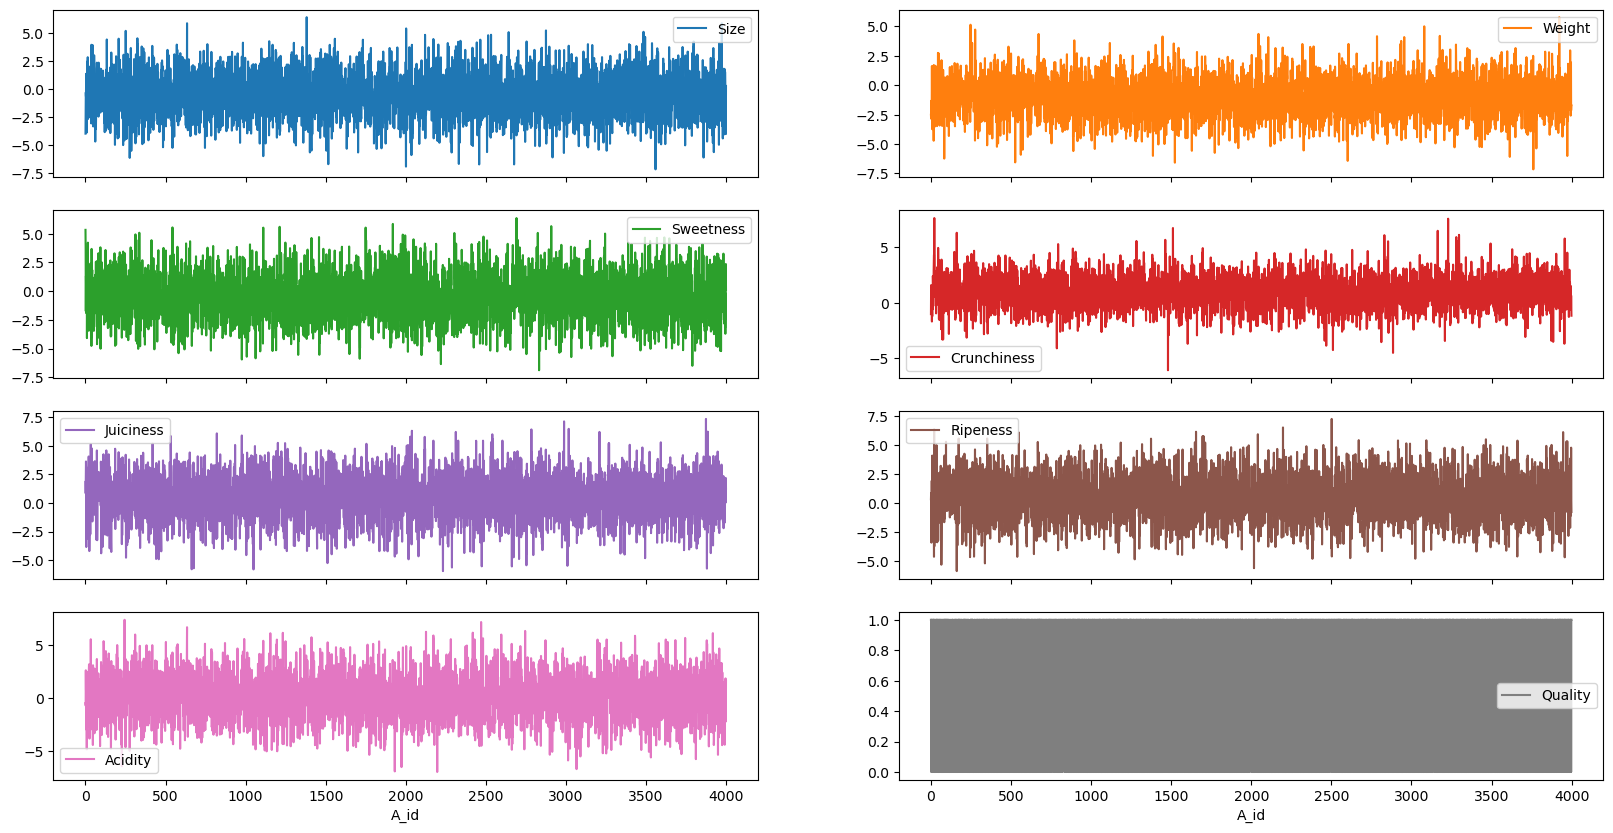

In [22]:
df.plot(subplots = True, figsize=(20,10), layout=(4,2))

From these plots it's not so clear of which type of data we're working with, those graphs seems a lot white noise (https://en.wikipedia.org/wiki/White_noise), the only one who differs is the quality in which only assumes value of 0 and 1 and so it has a rectangular shape as expected.

## Outliers

### Box plot of all features

<Axes: >

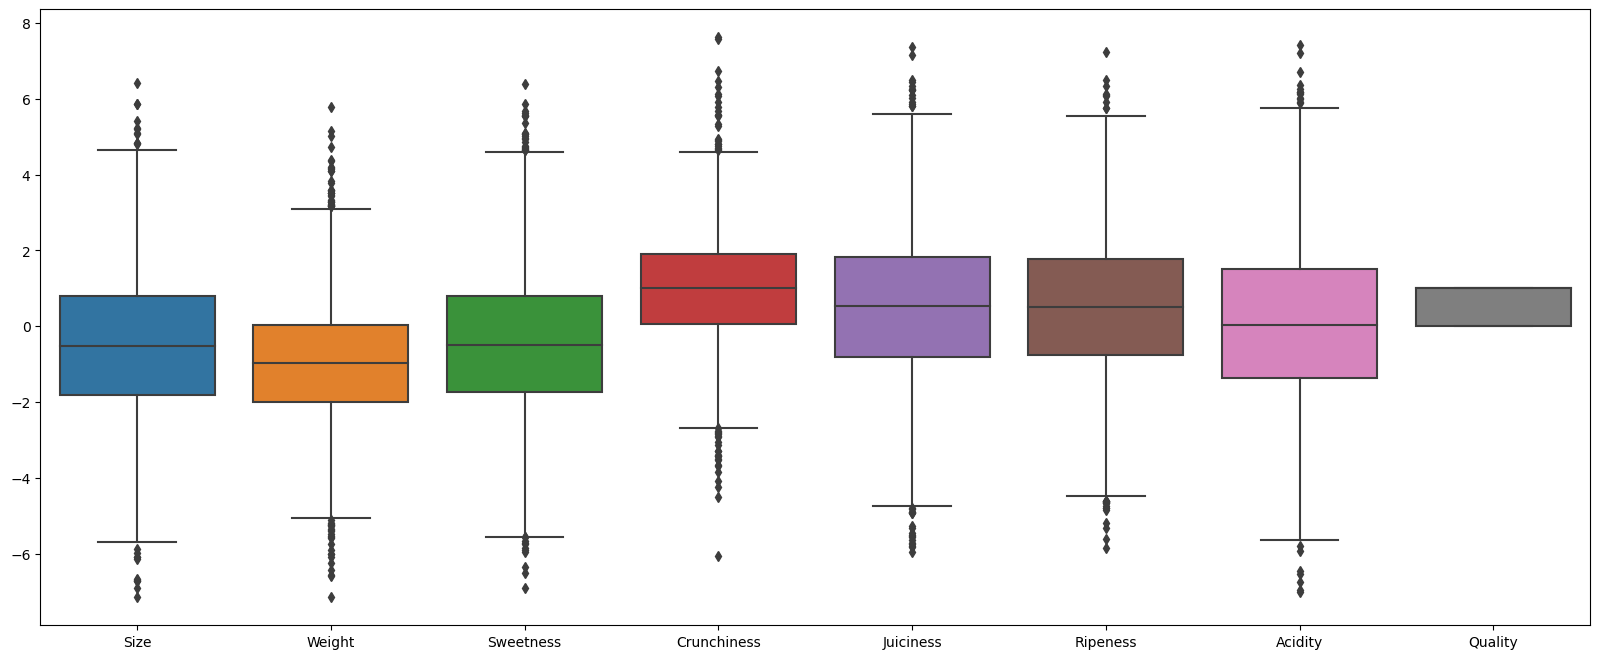

In [23]:
fig = plt.figure(figsize=(20,8))
sns.boxplot(df)

### IQR

The Interquartile Range (IQR) is a statistical measure that provides a measure of the spread or dispersion of a set of data points. It is defined as the range between the first quartile (Q1) and the third quartile (Q3) in a dataset. To find the boundaries for identifying potential outliers based on the IQR, a common rule of thumb is to consider values outside the range [Q1 - 1.5 IQR, Q3 + 1.5 IQR]

In [24]:
df_iqr = pd.DataFrame(columns = ['Column','Q1','Q3','Outliers'])

for col in df.columns:
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    mask = (df[col] > 1.5*q3) | (df[col]<1.5*q1)
    iqr_series = pd.Series({'Column':col,'Q1':q1,'Q3':q3,'Outliers':df[col][mask].size})
    df_iqr = pd.concat([df_iqr, iqr_series.to_frame().T])
df_iqr.index = df_iqr.Column
df_iqr.drop('Column',axis=1, inplace=True)
df_iqr

Q1        Q3 Outliers
Column                                  
Size        -1.816765  0.805526     1264
Weight       -2.01177  0.030976     1394
Sweetness   -1.738425  0.801922     1289
Crunchiness  0.062764  1.894234     1366
Juiciness   -0.801286  1.835976     1237
Ripeness    -0.771677  1.766212     1284
Acidity     -1.377424  1.510493     1266
Quality           0.0       1.0        0

In [25]:
#Execute an AdFuller test on the data. If the p-value is less than <=0.05 the data is stationary, otherwise it is not.
def adfuller_test(data):
  adf_test = adfuller(data,autolag='AIC') # AIC is the default option
  if adf_test[1] <= 0.05:
    return True
  return False
#Execute a KPSS test on the data passed by the argument. If the p-value is less than 0.05 then null hypothesis cannot be rejected
# and that's means the data is not trend stationary, otherwise is trend stationary.
def kpss_test(data):
  kpss_out = kpss(data,regression='c', nlags='auto', store=True)
  if kpss_out[1] <= 0.05:
    return False
  return True

In [26]:
adfuller_test(df.Size)
kpss_test(df.Size)
df_stationary_results =  pd.DataFrame(columns=['Feature','KPSS','ADF'])
for column in df.columns:
    stationary_column_res_series = pd.Series({'Feature':column,'KPSS': kpss_test(df[column]), 'ADF':adfuller_test(df[column])})
    df_stationary_results = pd.concat([df_stationary_results, stationary_column_res_series.to_frame().T])

df_stationary_results.index = df_stationary_results.Feature
df_stationary_results.drop(['Feature'], inplace=True, axis=1) 

In [27]:
df_stationary_results

KPSS   ADF
Feature                
Size         True  True
Weight       True  True
Sweetness    True  True
Crunchiness  True  True
Juiciness    True  True
Ripeness     True  True
Acidity      True  True
Quality      True  True

This is a really good sign because all the features are stationary and this means that shifting by some fixed amount gives the same probabilistic description of the random variables. In practical terms the distribution stay the same after a displacement

## Distribution
### Proportion of good and bad apples

Text(0.5, 1.0, 'Quality')

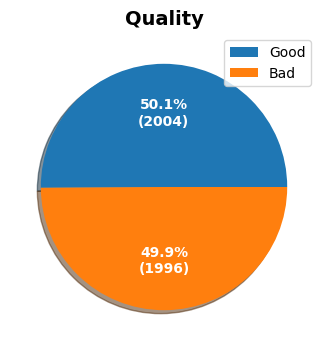

In [28]:
df_quality = df['Quality'].value_counts().to_frame()
labels = ['Good','Bad']
values = df_quality.iloc[:,0].to_list()

def autopct_fun(abs_values):
    gen = iter(abs_values)
    return lambda pct: f"{pct:.1f}%\n({next(gen)})"

fig,ax = plt.subplots(figsize = (4,4))
ax.pie(x = values, labels = labels, autopct=autopct_fun(values), shadow = True, textprops = {'color':'white', 'fontsize':10, 'fontweight':'bold'})
ax.legend(labels)
ax.set_title("Quality", fontsize = 14, fontweight = "bold", color = "black")

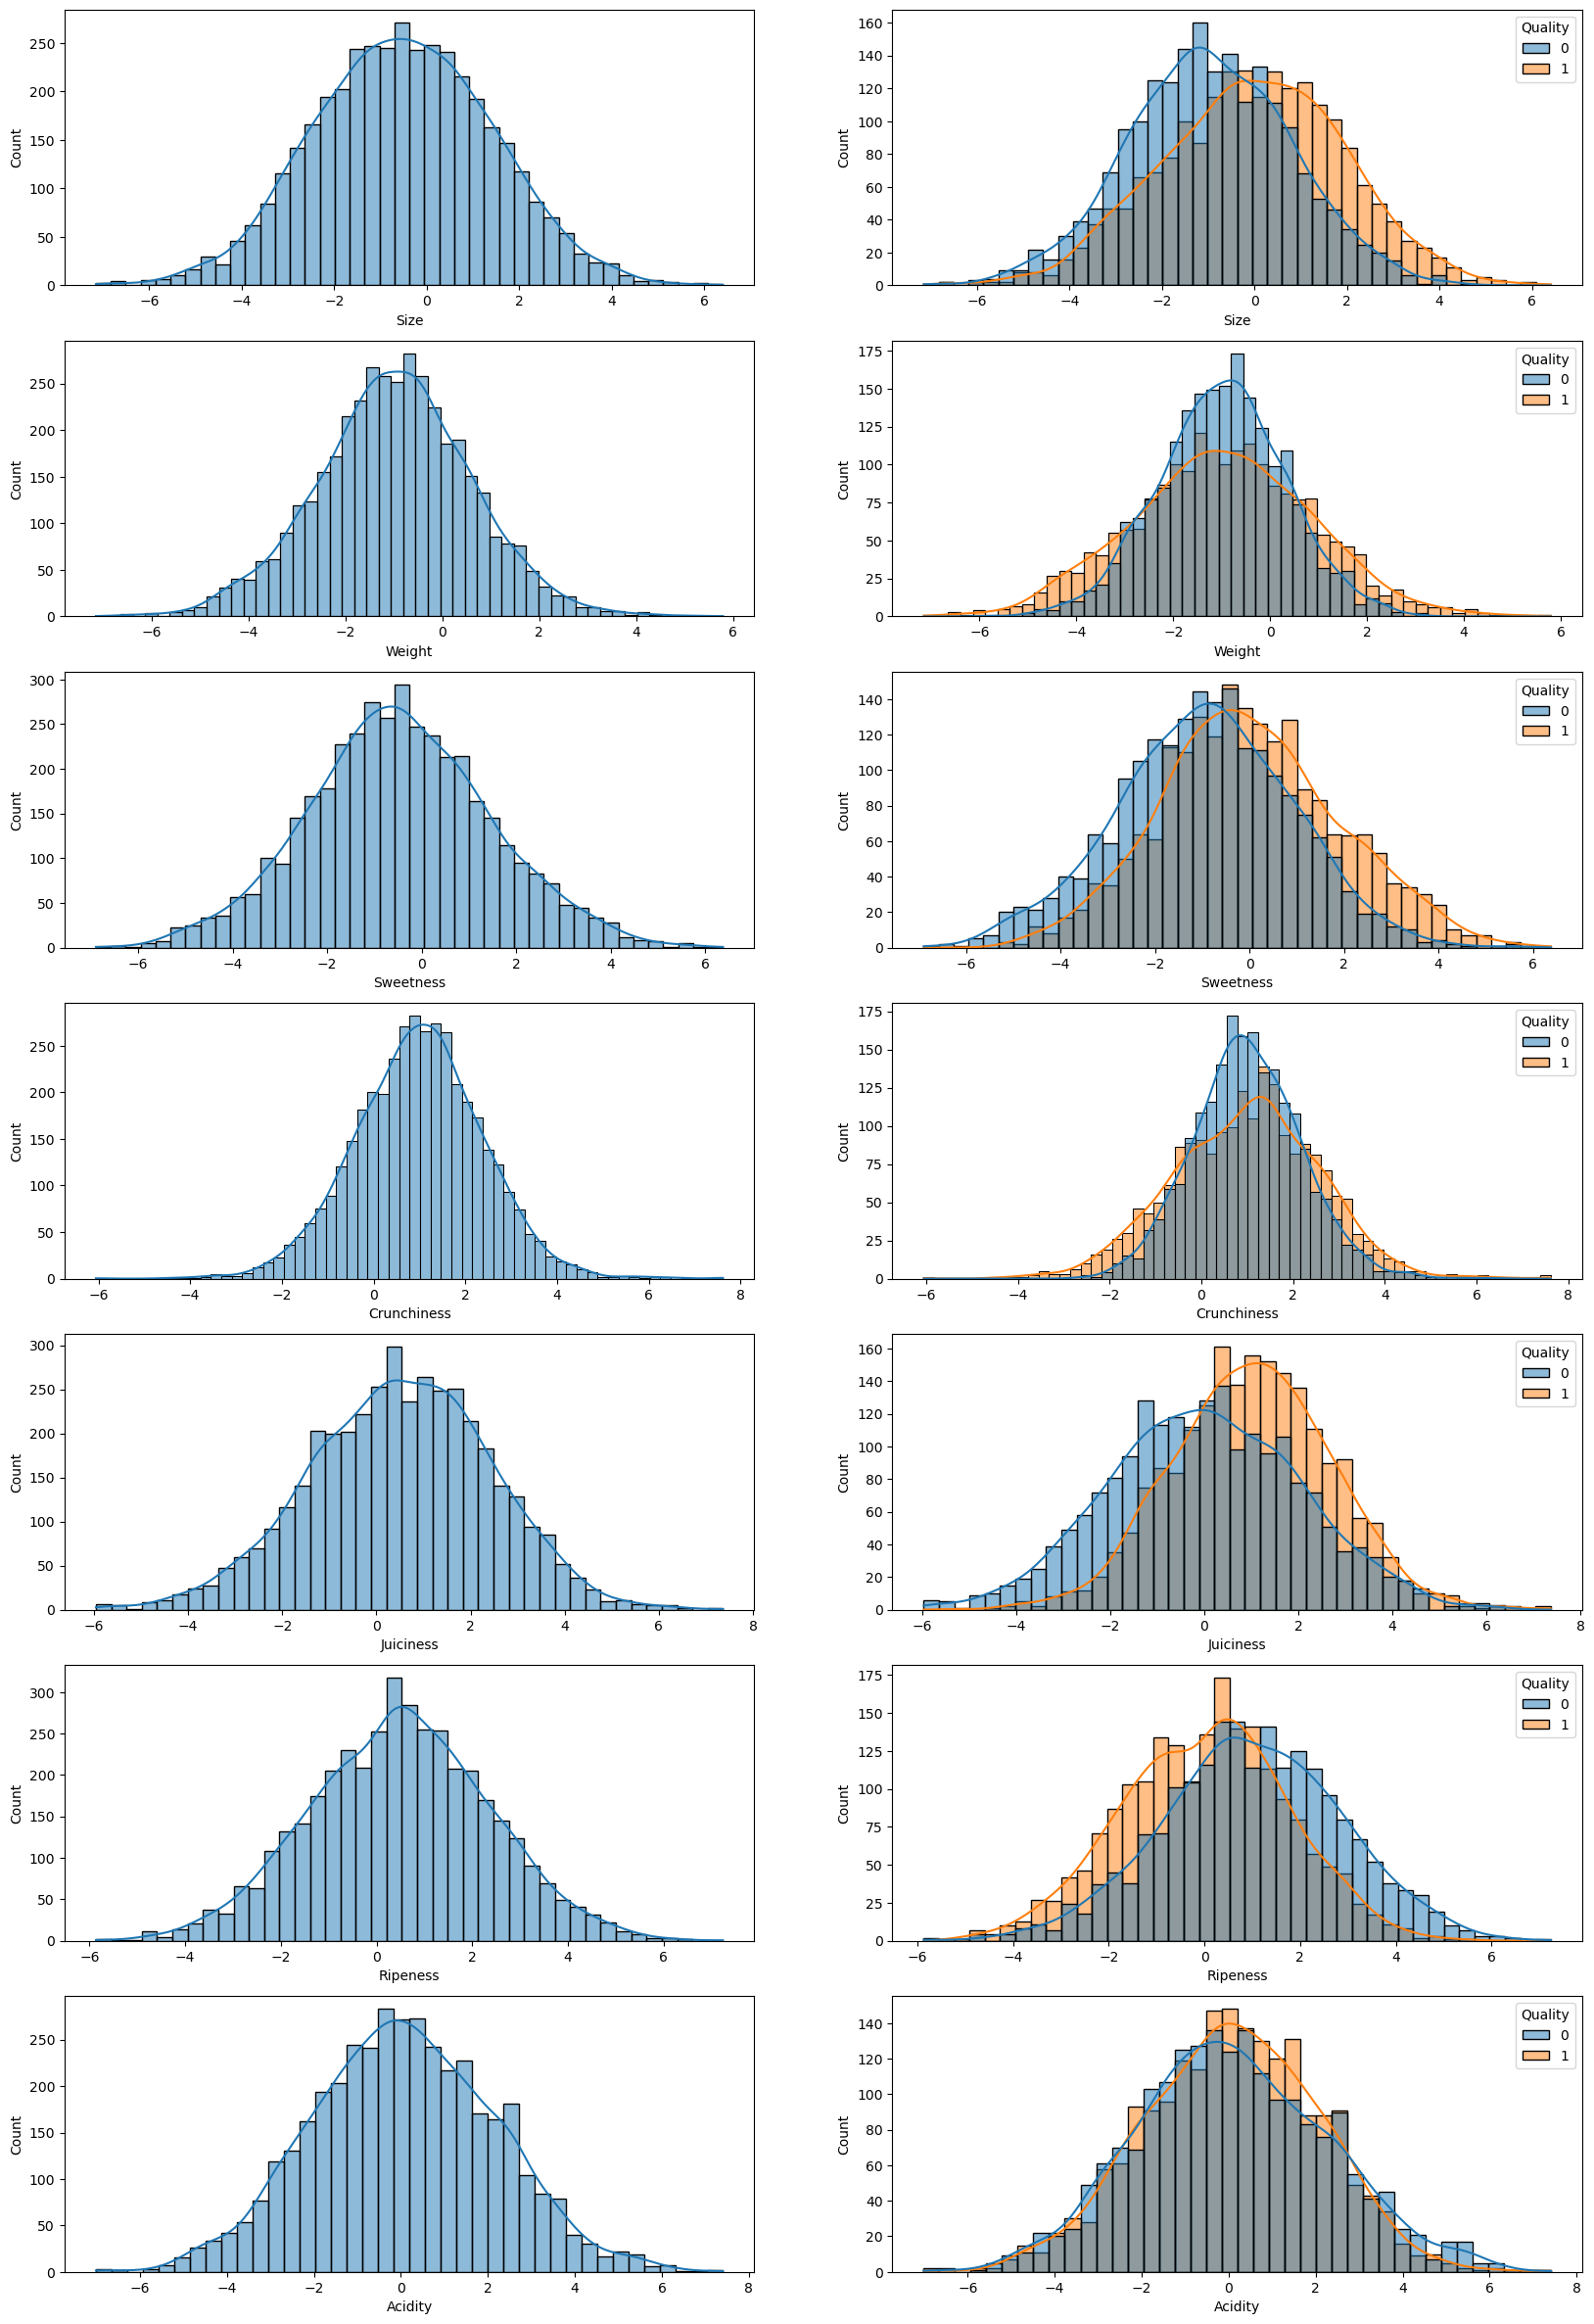

In [29]:
fig, axes = plt.subplots(7,2, figsize=(20,30))
for i in range(7):
    sns.histplot(data=df, x=df.columns[i], ax=axes[i][0], kde=True)
    sns.histplot(data=df, x=df.columns[i], ax=axes[i][1], hue='Quality', kde=True)

To the left can be seen the distribution of the single feature, to the right we can see the distribution for the values with quality equals to 1 and equals to 0. With and without considering the quality parameter, it's possible to see that the data is somewhat following a normal distribution.

## Statistical Tests
### Normal Distribution

We've seen from above that the distributions of the features seems to follow a normal distribution, this part will try to test statistically and visually if the distribution is a normal one. It is an important to step to decide which type of models we can use, if the data is following a Normal Distribution then we can think of using the Gaussian Naive Bayes Model for the modeling part, or if the data is following another type of distribution then we can think of different models.

In [30]:
normal_res_df = pd.DataFrame(columns=['Name','Normal_Test','Shapiro'])

for col in df.columns:
    statistic_normal, p_value_normal_test = stats.normaltest(df[col])
    stat_shapiro, p_value_shapiro = stats.shapiro(df[col])
    anderson_test = stats.anderson(df[col])
    sig_res = anderson_test.significance_level[anderson_test.statistic < anderson_test.critical_values]
    res_series = pd.Series({'Name':col, 'Normal_Test': p_value_normal_test > 0.05, 'Shapiro': p_value_shapiro > 0.05,'Anderson': len(sig_res) > 0})

    normal_res_df = pd.concat([normal_res_df, res_series.to_frame().T])
normal_res_df.index = normal_res_df.Name
normal_res_df.drop('Name',inplace=True,axis=1)

In [31]:
display(normal_res_df)

Normal_Test Shapiro Anderson
Name                                    
Size               True    True     True
Weight            False   False    False
Sweetness          True   False    False
Crunchiness       False   False    False
Juiciness         False   False     True
Ripeness           True    True     True
Acidity            True    True     True
Quality           False   False    False

All these statistical tests gives us different result regarding the normal distribution of our features, because the normal test gives us 4 features which follows a Normal test, the Shapiro test 3 and the Anderson 4. We can say for sure that Size, Ripeness and Acidity follow a normal distribution. Another way to figure out if the features follows a normal distribution is the Q-Q plot.

### Q-Q Plot

A Quantile-Quantile (Q-Q) plot is a graphical tool used to assess whether a given dataset follows a particular theoretical distribution, such as the normal distribution.

Linearity:
Straight Line: If the points on the Q-Q plot fall approximately along a straight line, it suggests that the data follows the theoretical distribution being tested (e.g., normal distribution).
Curvature or Deviation: If the points deviate from a straight line, especially towards the tails, it indicates a departure from the assumed distribution.

Symmetry:
Symmetric Distribution: If the points are symmetrically distributed around the diagonal line (y=x), it suggests that the data is symmetrically distributed.

Skewness or Asymmetry: Asymmetry in the plot may indicate skewness in the data.

Outliers:
Outliers Away from the Line: Outliers that are far from the diagonal line may suggest extreme values or heavy tails not captured by the assumed distribution.

Tails:
Curvature in Tails: Curvature in the tails of the Q-Q plot indicates differences between the sample distribution and the theoretical distribution in those regions.

Compare with Reference Line:
    Perfect Fit: If the points fall perfectly along the diagonal line, it indicates a perfect fit to the assumed distribution.
    
   Departure from Line: Any departure from the diagonal line suggests a departure from the assumed distribution.


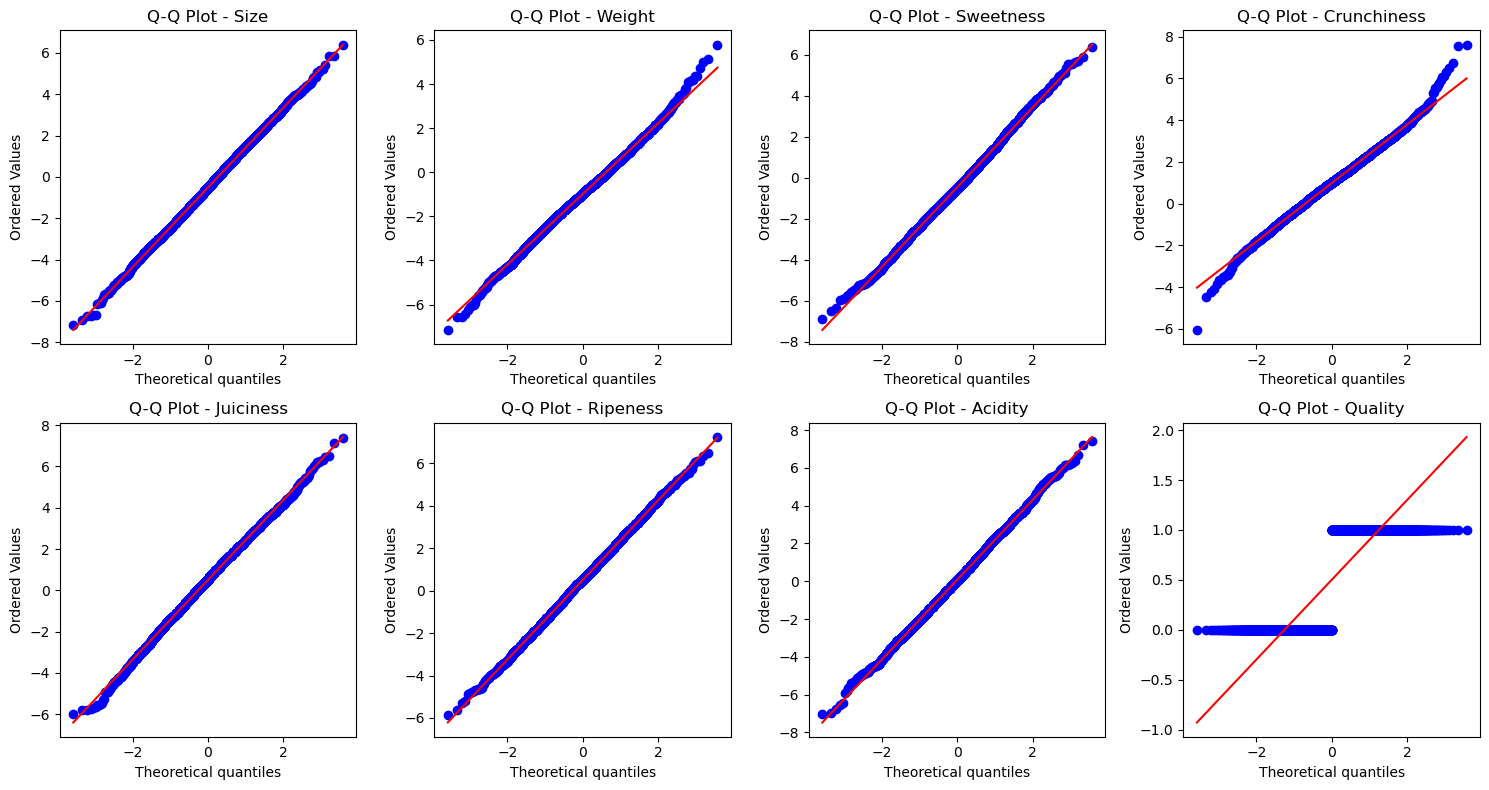

In [32]:
num_rows, num_cols = 2, 4
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 8))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate through each column and create Q-Q plots
for i, column in enumerate(df.columns):
    stats.probplot(df[column], dist='norm', plot=axes[i])
    axes[i].set_title(f'Q-Q Plot - {column}')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

The data seems following the red line in all the plots except for the last one which we are not interested because it's a binomial.The Crunchiness and the Juiciness are the ones who have most curvature in the tails.

## Independence of the Features

Why is it important to have indepenence of the features:

Improved Model Accuracy: When features are independent, they provide unique information to the model. This reduces redundancy and helps the model capture the true relationships between features and the target variable, leading to more accurate predictions.

Reduced Overfitting: Independent features are less likely to be correlated with each other, which lowers the risk of the model overfitting to noise in the data. This translates to better generalizability to unseen data.

Enhanced Interpretability: If features are independent, their individual contribution to the model's predictions becomes clearer. This allows for better understanding of the model's decision-making process and provides valuable insights into the problem being studied.

### Visual Test

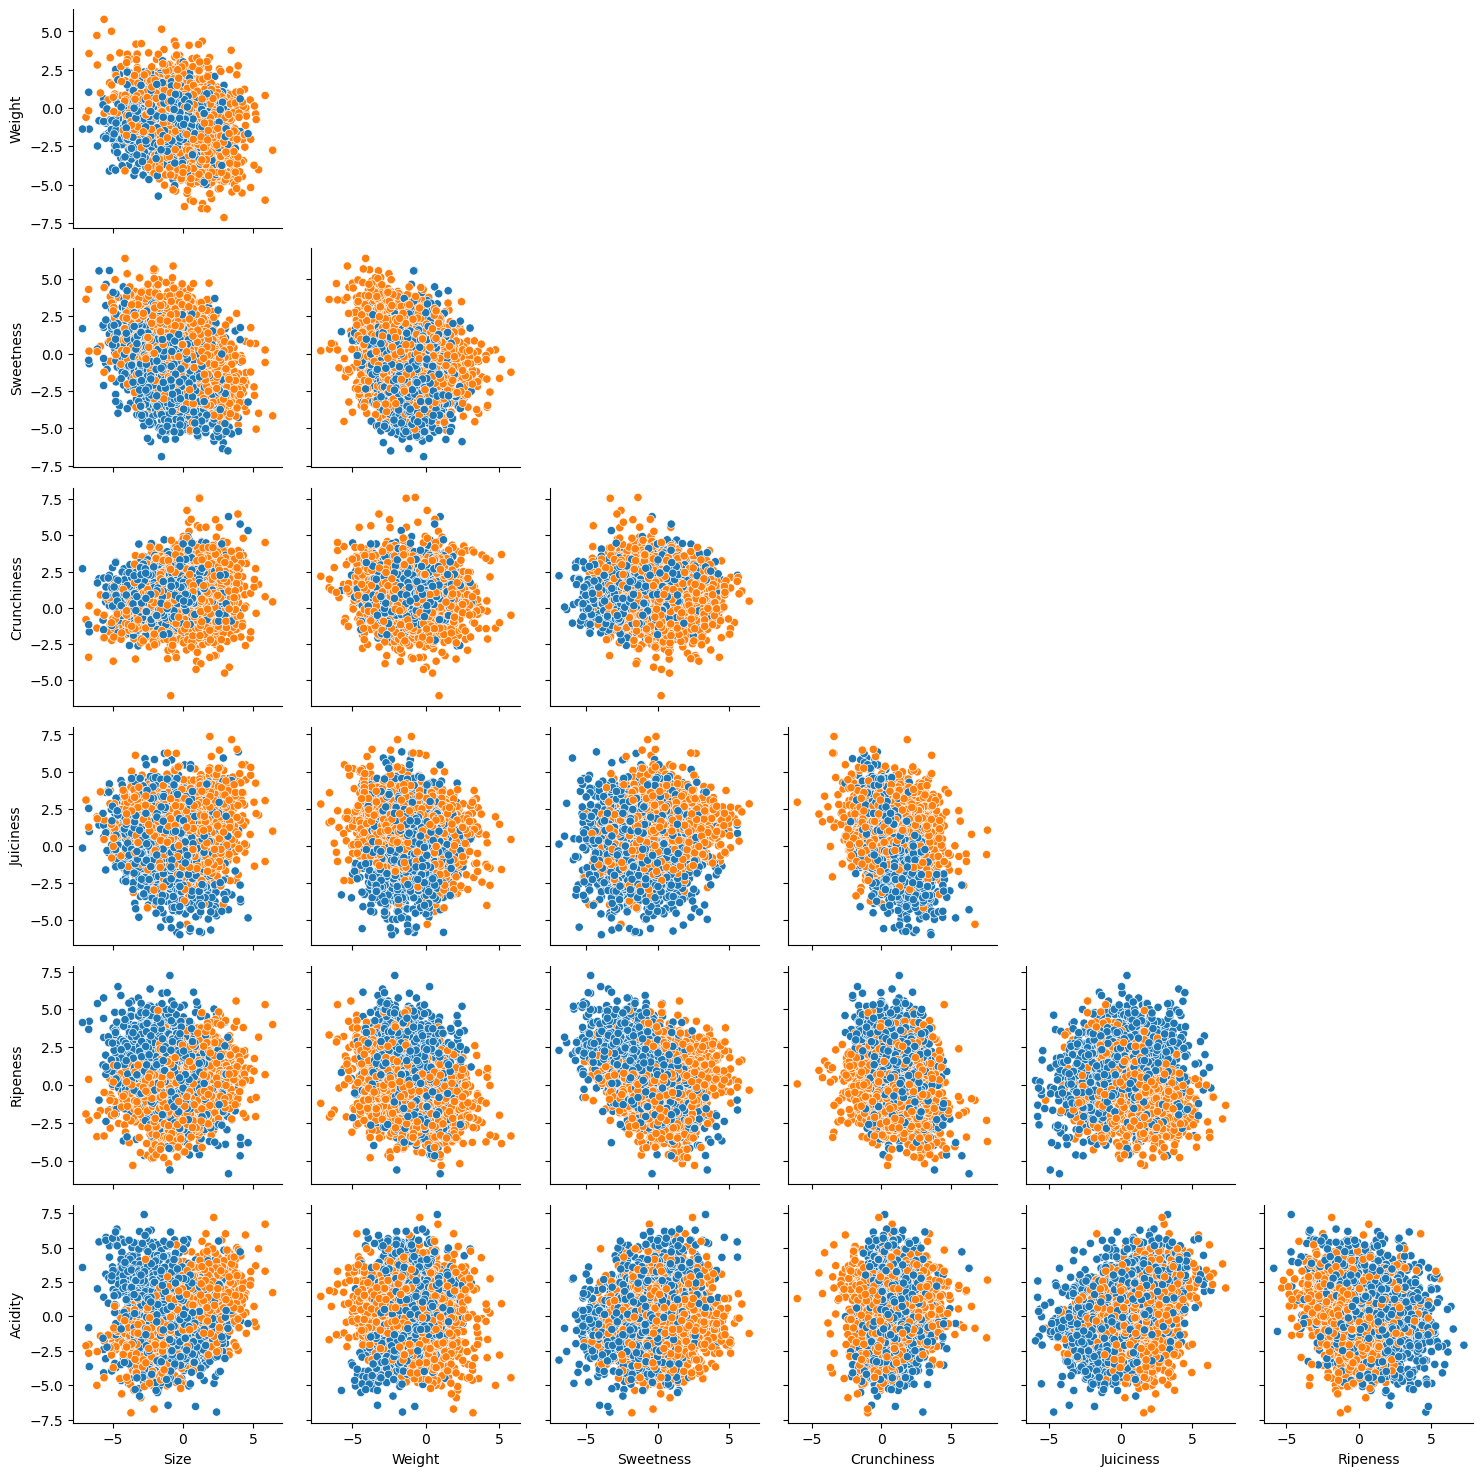

In [33]:
pair_grid = sns.PairGrid(df,corner=True,diag_sharey=False, hue='Quality')
pair_grid.map_lower(sns.scatterplot, color='blue')
#Remove the diagonal plots
for i in range(pair_grid.axes.shape[0]):
    for j in range(pair_grid.axes.shape[1]):
        if i == j:
            pair_grid.axes[i, j].remove()

### Correlation

According to the graph shown we can see that no pair of variables presents a correlation, we are going to create the correlation matrix, according to the result of the normal distribution from all perspectives (visually and statistically) it seems that the majority of the features is following a normal distribution. Given the fact that from the plots there does not seem to be a linear relationship, the choice for the correlation method is the Sperman.

Use Pearson:
For continuous, interval-scaled data
When interested in the strength and direction of a linear relationship
When data is approximately normally distributed

Use Spearman:
For ordinal data (rankings, Likert scales)
When data is not normally distributed
When only interested in the direction of the relationship, not necessarily the strength

<Axes: >

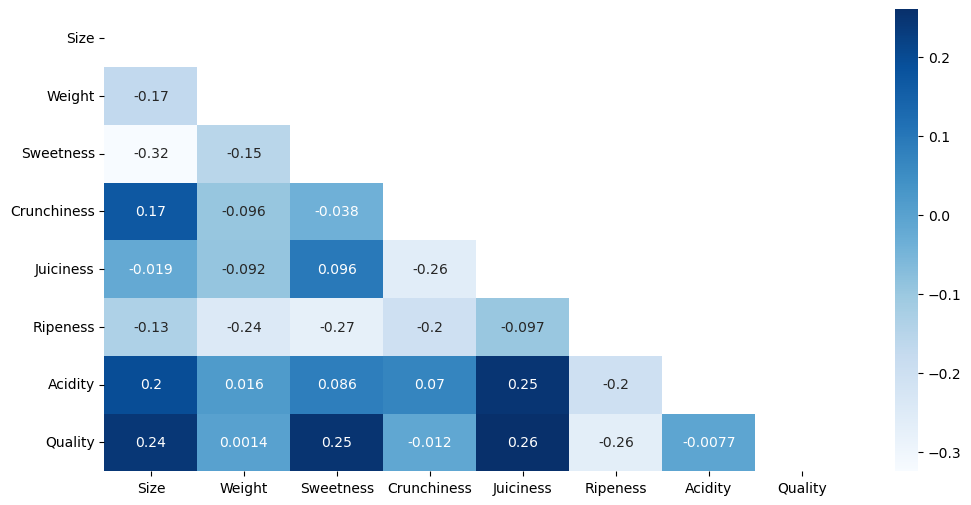

In [34]:
correlation_matrix_df = df.corr(method='pearson')
fig = plt.figure(figsize=(12,6))
mask = np.triu(np.ones_like(correlation_matrix_df, dtype=bool))
sns.heatmap(correlation_matrix_df,annot=True,cmap='Blues', mask = mask)

<Axes: >

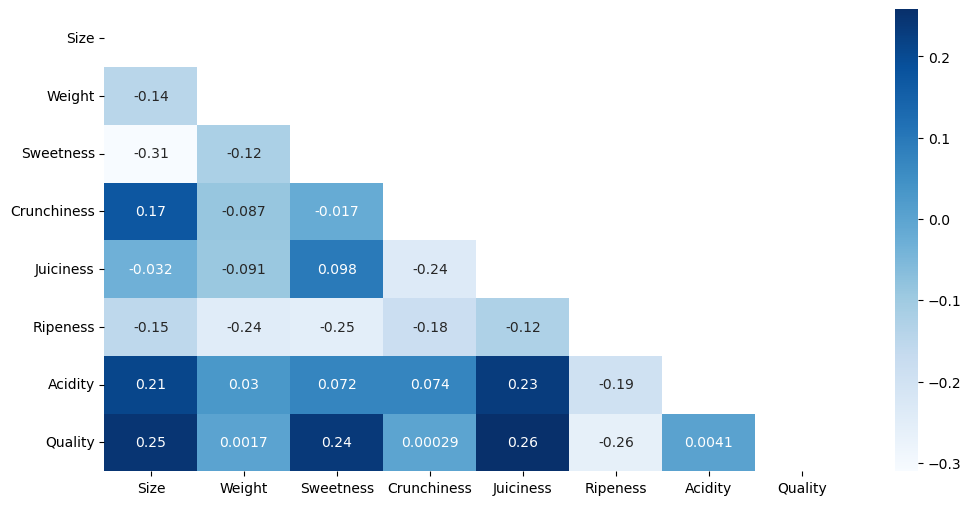

In [35]:
correlation_matrix_df = df.corr(method='spearman')
fig = plt.figure(figsize=(12,6))
mask = np.triu(np.ones_like(correlation_matrix_df, dtype=bool))
sns.heatmap(correlation_matrix_df,annot=True,cmap='Blues', mask = mask)

They give moreover the same results, there does not seem to be strong correlation between the features.

### Correlation Distance

Another type of test is done by seeing the distance correlation which measures the dependence between two sets of features, regardless of their distribution and without assuming linearity. Unlike Pearson's correlation, which is limited to linear relationships, distance correlation can detect both linear and non-linear relationships between variables

In [36]:
!pip install hyppo

In [37]:
from hyppo.independence import Dcorr
import math
dcorr = Dcorr()
#Assuming df is your DataFrame with numerical features
cols = [column for column in df.columns if column != 'Quality']
num_rows = len(cols)
for i in range(num_rows):
    for j in range(i+1, num_rows):
            stat,_ = dcorr.test(df[cols[i]].values, df[cols[j]].values)
            print(f"[{cols[i]}, {cols[j]}]",stat)

[Size, Weight] 0.020177206950486387
[Size, Sweetness] 0.08510322837721489
[Size, Crunchiness] 0.03127043074973708
[Size, Juiciness] 0.008682617664582119
[Size, Ripeness] 0.024535561069435857
[Size, Acidity] 0.04803597999879566
[Weight, Sweetness] 0.019150780028428467
[Weight, Crunchiness] 0.007475492357510503
[Weight, Juiciness] 0.009155993297928154
[Weight, Ripeness] 0.0539154326329786
[Weight, Acidity] 0.0021577298836780324
[Sweetness, Crunchiness] 0.0015443328547240403
[Sweetness, Juiciness] 0.009887972398875022
[Sweetness, Ripeness] 0.06853423186466334
[Sweetness, Acidity] 0.011688657293303479
[Crunchiness, Juiciness] 0.0504056841485978
[Crunchiness, Ripeness] 0.032947139481567266
[Crunchiness, Acidity] 0.011250429216358122
[Juiciness, Ripeness] 0.02098122503653179
[Juiciness, Acidity] 0.053057577045028774
[Ripeness, Acidity] 0.03964038826318731


Those are low number, so we can assume that there is no dependence between the features, this tests basically just confirmed what we've known before.

## Machine Learning

The aim of this part is to classify whether an apple has a good or bad quality. The columns are divided in two parts: the predictors and the predicted value. The predictor columns are composed of 7 features: Size, Weight, Acidity, Ripeness, Sweetness, Juiciness and Crunchiness, the value we want to predict is the Quality. We'll start with a Tree decision Classifier then moving to a SVC and lastly to a Neural network. Lastly we will compare the different models and see which is the best one.

### Importing Libraries

In [38]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB, BernoulliNB

### Prepare the data

In [39]:
X = df.drop('Quality',axis=1).values
y = df['Quality'].values
print(X.shape)
print(y.shape)

(4000, 7)
(4000,)


### Divide the datatset into train and test set

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Create the standardized data


In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Model evaluation class

In [42]:
class Model:
    def __init__(self, model,name=None, scaled=False):
        self.model = model
        self.name = name
        self.scaled = scaled
    def fit(self):
        if self.scaled:
            self.model.fit(X_train_scaled, y_train)
        else:
            self.model.fit(X_train, y_train)
    def __get_predictions(self):
        if self.scaled:
            return self.model.predict(X_test_scaled), self.model.predict_proba(X_test_scaled)[:,1]
        else:
            return self.model.predict(X_test), self.model.predict_proba(X_test)[:,1]
        
    def get_metrics(self) -> pd.Series:
        y_pred, y_probs = self.__get_predictions()
        accuracy = metrics.accuracy_score(y_test, y_pred)
        precision = metrics.precision_score(y_test, y_pred)
        recall = metrics.recall_score(y_test, y_pred)
        f1 = metrics.f1_score(y_test, y_pred)
        roc_auc = metrics.roc_auc_score(y_test, y_probs)
        conf_mat = metrics.confusion_matrix(y_test, y_pred)
        pr_auc = metrics.average_precision_score(y_test, y_probs)
        metrics_series = pd.Series({
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC AUC': roc_auc,
            'Confusion Matrix': conf_mat,
            'PR AUC': pr_auc,
            'Name': self.name
        })
        if self.name == '' or self.name is None:
            metrics_series.Name =type(self.model).__name__
        return metrics_series
    
    def visualize_metrics(self):
        y_pred, y_probs = self.__get_predictions()
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_probs)
        roc_auc = metrics.roc_auc_score(y_test, y_probs)
        # Calculate Precision-Recall curve and AUC
        precision, recall, _ = metrics.precision_recall_curve(y_test, y_probs)
        pr_auc = metrics.auc(recall, precision)
        # Plot ROC curve
        plt.figure(figsize=(20, 10))
        plt.subplot(2, 2, 1)
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate (FPR)')
        plt.ylabel('True Positive Rate (TPR)')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')

        # Plot Precision-Recall curve
        plt.subplot(2, 2, 2)
        plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.legend(loc='lower left')
        residuals = y_test - y_probs
        # Plot Confusion Matrix and Distribution of errors
        plt.subplot(2, 2, 3)
        conf_mat = metrics.confusion_matrix(y_test, y_pred)
        sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=['Predicted 0', 'Predicted 1'],
                    yticklabels=['Actual 0', 'Actual 1'])
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Confusion Matrix')
        plt.subplot(2, 2, 4)
        sns.histplot(residuals, bins=30, edgecolor='black', kde=True)
        plt.xlabel('Residuals')
        plt.ylabel('Frequency')
        plt.title('Distribution of Errors')
        plt.show()

In [43]:
models_df = pd.DataFrame(columns=['Name',
    'Accuracy',
            'Precision',
            'Recall',
            'F1-Score',
            'ROC AUC',
            'Confusion Matrix',
            'PR AUC'])

### Naive Bayes (Gaussian)

Naive Bayes is a family of probabilistic algorithms based on Bayes' theorem, which is a fundamental theorem in probability theory. It's based on:

Bayes' Theorem which calculates the probability of a hypothesis given the observed evidence.

Independence Assumption: features must be independent from each other

There are a lot of different Naive Bayes algorithms which are based on the distribution of the data. Recalling the fact that 4 of the features follows a normal distribution and from previous calculation we've determined that there is not a lot of dependency between the features so I've decided to use the Gaussian NB algorithm

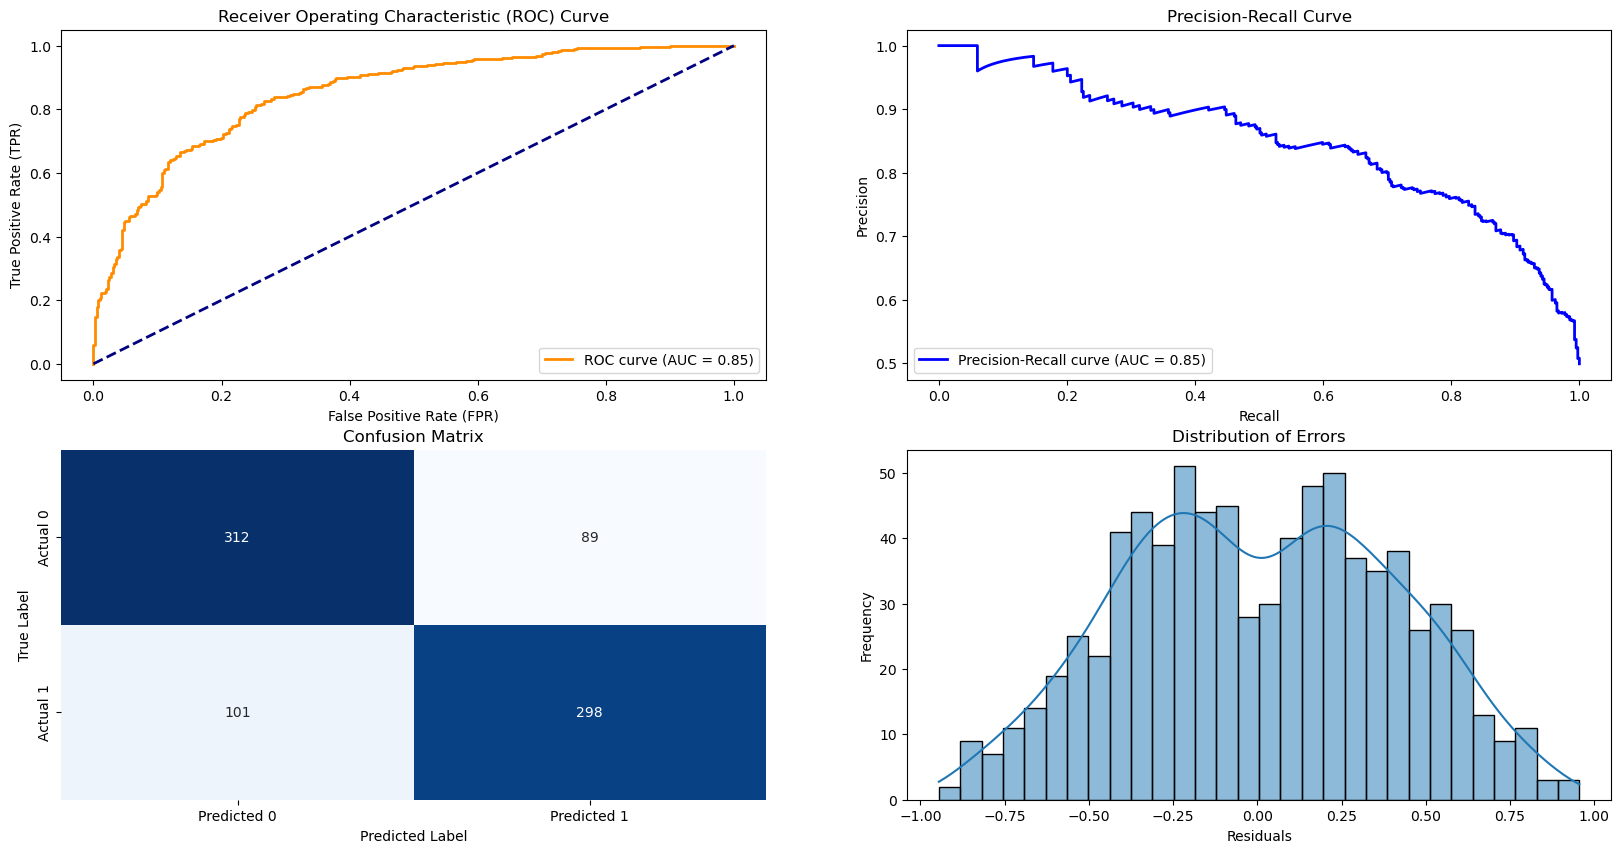

In [44]:
model = Model(GaussianNB(), name='Gaussian Naive Bayes')
model.fit()
model.visualize_metrics()

In [45]:
metrics_NB = model.get_metrics()
models_df = pd.concat([models_df, metrics_NB.to_frame().T])
print(metrics_NB)

Accuracy                             0.7625
Precision                          0.770026
Recall                             0.746867
F1-Score                            0.75827
ROC AUC                            0.850899
Confusion Matrix    [[312, 89], [101, 298]]
PR AUC                             0.846821
Name                   Gaussian Naive Bayes
dtype: object


### Bernoulli Naive Bayes

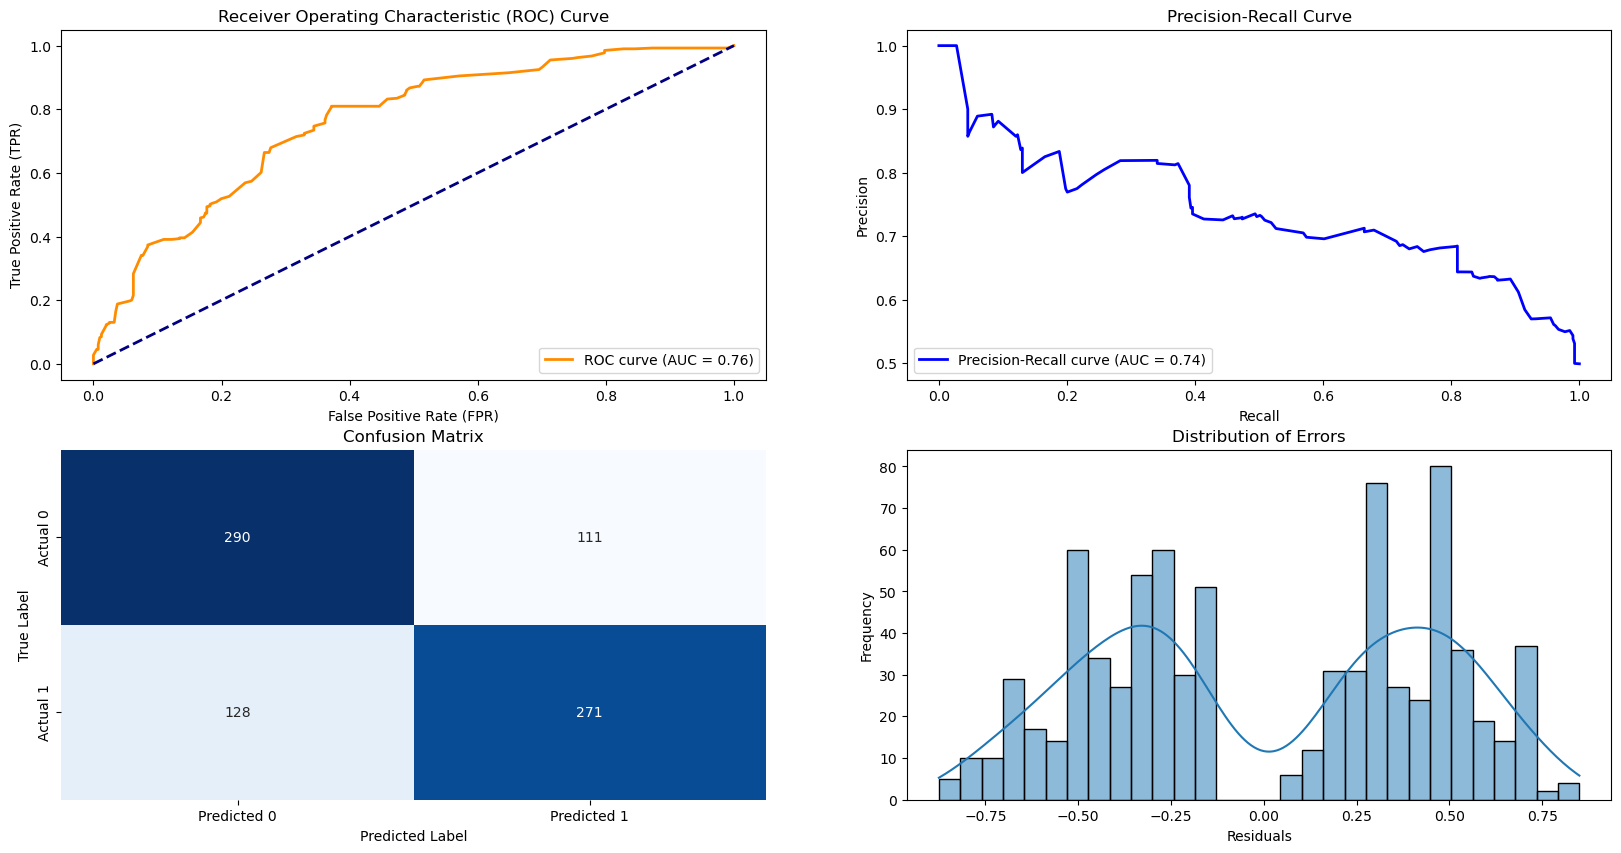

In [46]:
model = Model(BernoulliNB(),'Bernoulli Naive Bayes')
model.fit()
model.visualize_metrics()

In [47]:
metrics_BNB = model.get_metrics()
models_df = pd.concat([models_df, metrics_BNB.to_frame().T])
print(metrics_BNB)

Accuracy                             0.70125
Precision                           0.709424
Recall                              0.679198
F1-Score                            0.693982
ROC AUC                             0.759252
Confusion Matrix    [[290, 111], [128, 271]]
PR AUC                              0.737735
Name                   Bernoulli Naive Bayes
dtype: object


### Logistic Regression

Logistic regression is a statistical method used for binary classification, which means predicting the probability that an instance belongs to one of two classes. Despite its name, logistic regression is primarily employed for classification tasks rather than regression.

In logistic regression, the logistic function, also known as the sigmoid function, is used to model the relationship between the independent variables and the probability of the dependent variable belonging to a particular class. The output of the logistic regression model is a probability score between 0 and 1, and a threshold is typically applied to classify instances into one of the two classes.

The logistic regression model assumes a linear relationship between the independent variables and the log-odds of the probability of the dependent variable. The model is trained by adjusting the weights of the independent variables through an optimization process, often using techniques like maximum likelihood estimation.

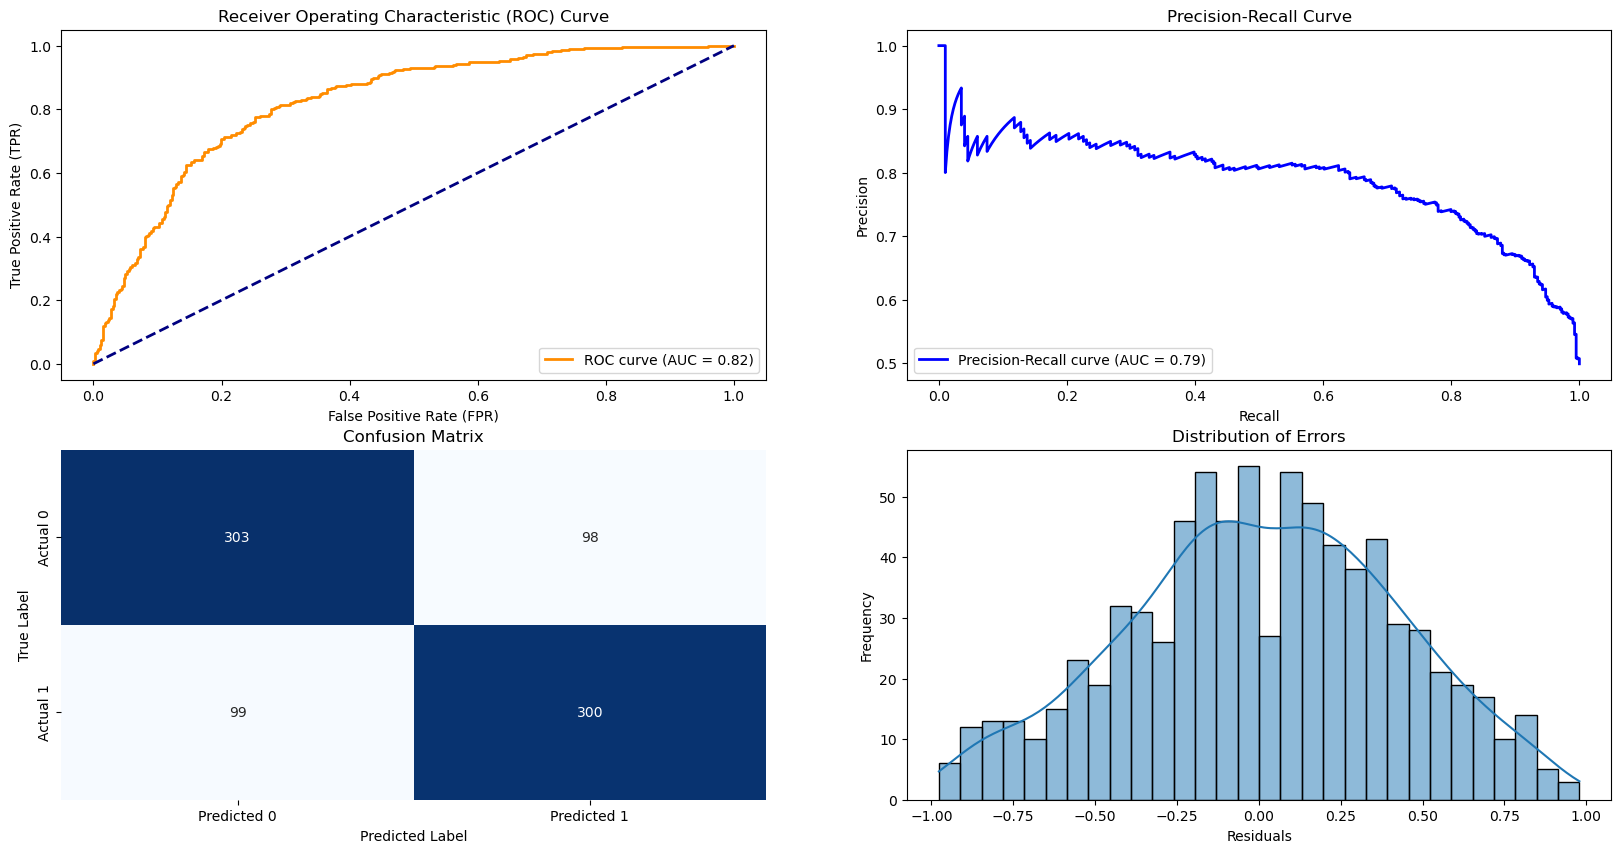

In [48]:
# Create the model
model = Model(LogisticRegression(), name='Logistic Regression')
model.fit()
model.visualize_metrics()

In [49]:
metrics_LR = model.get_metrics()
models_df = pd.concat([models_df, metrics_LR.to_frame().T])
print(metrics_LR)

Accuracy                           0.75375
Precision                         0.753769
Recall                             0.75188
F1-Score                          0.752823
ROC AUC                            0.82313
Confusion Matrix    [[303, 98], [99, 300]]
PR AUC                            0.790266
Name                   Logistic Regression
dtype: object


### Scaled

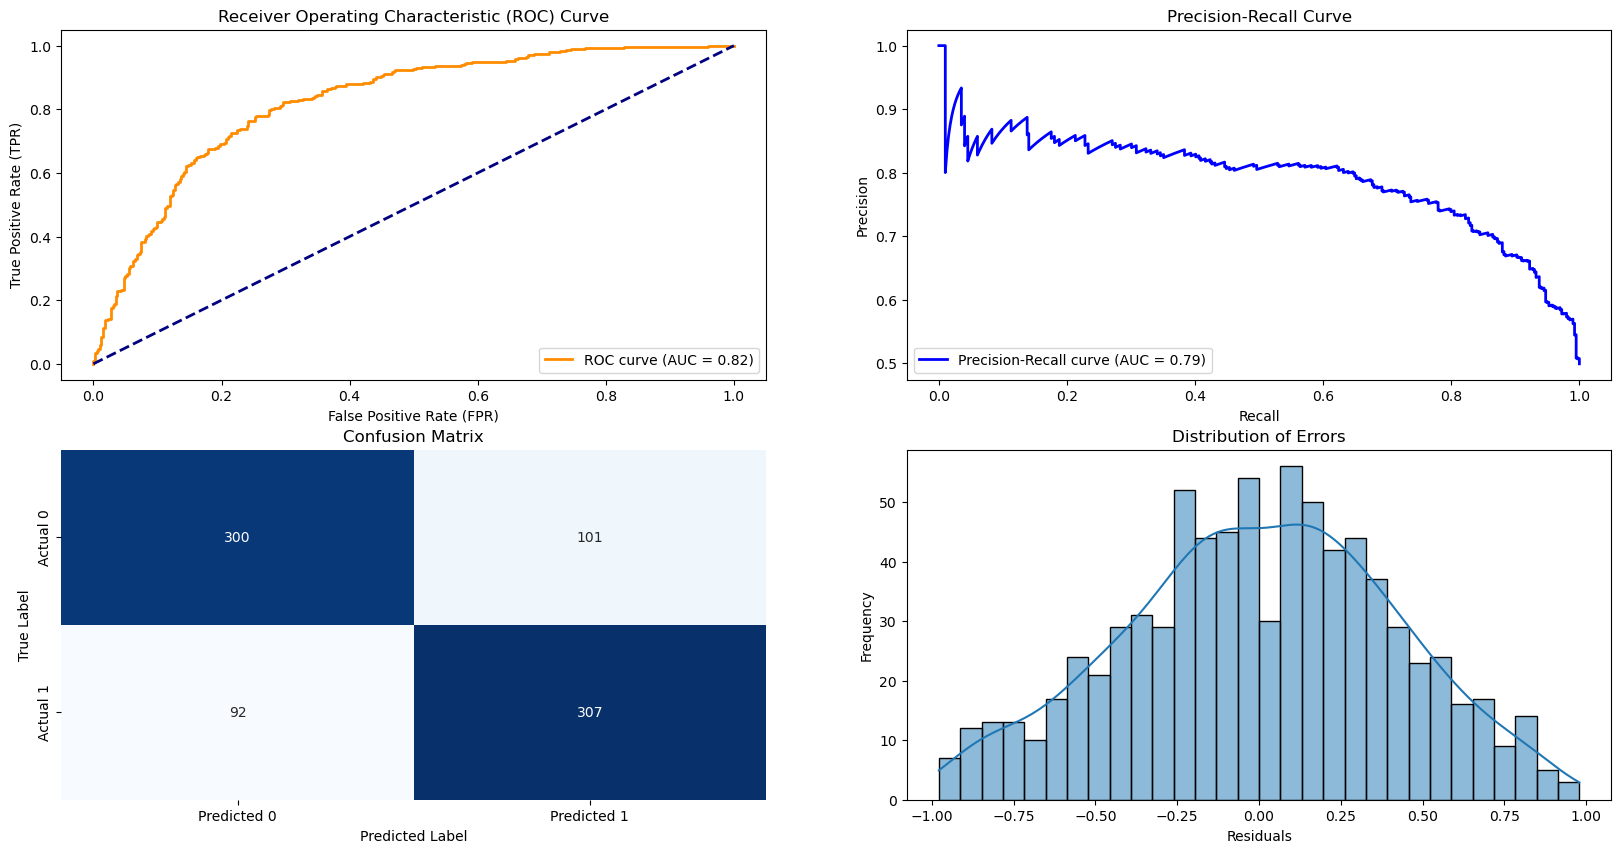

In [50]:
# Create the model
model = Model(LogisticRegression(), name='Logistic Regression Scaled', scaled=True)
model.fit()
model.visualize_metrics()

In [51]:
metrics_LR_Scaled = model.get_metrics()
models_df = pd.concat([models_df, metrics_LR_Scaled.to_frame().T])
print(metrics_LR_Scaled)

Accuracy                               0.75875
Precision                             0.752451
Recall                                0.769424
F1-Score                              0.760843
ROC AUC                               0.823249
Confusion Matrix       [[300, 101], [92, 307]]
PR AUC                                0.790764
Name                Logistic Regression Scaled
dtype: object


### Best Logistic Regression Model

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],  # Regularization penalty
    'solver': ['liblinear', 'lbfgs','newton-cg','newton-cholesky','sag','saga']  # Optimization algorithm
}
clf = GridSearchCV(LogisticRegression(), param_grid)
clf = clf.fit(X_train_scaled, y_train)
print(clf.best_params_)

{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


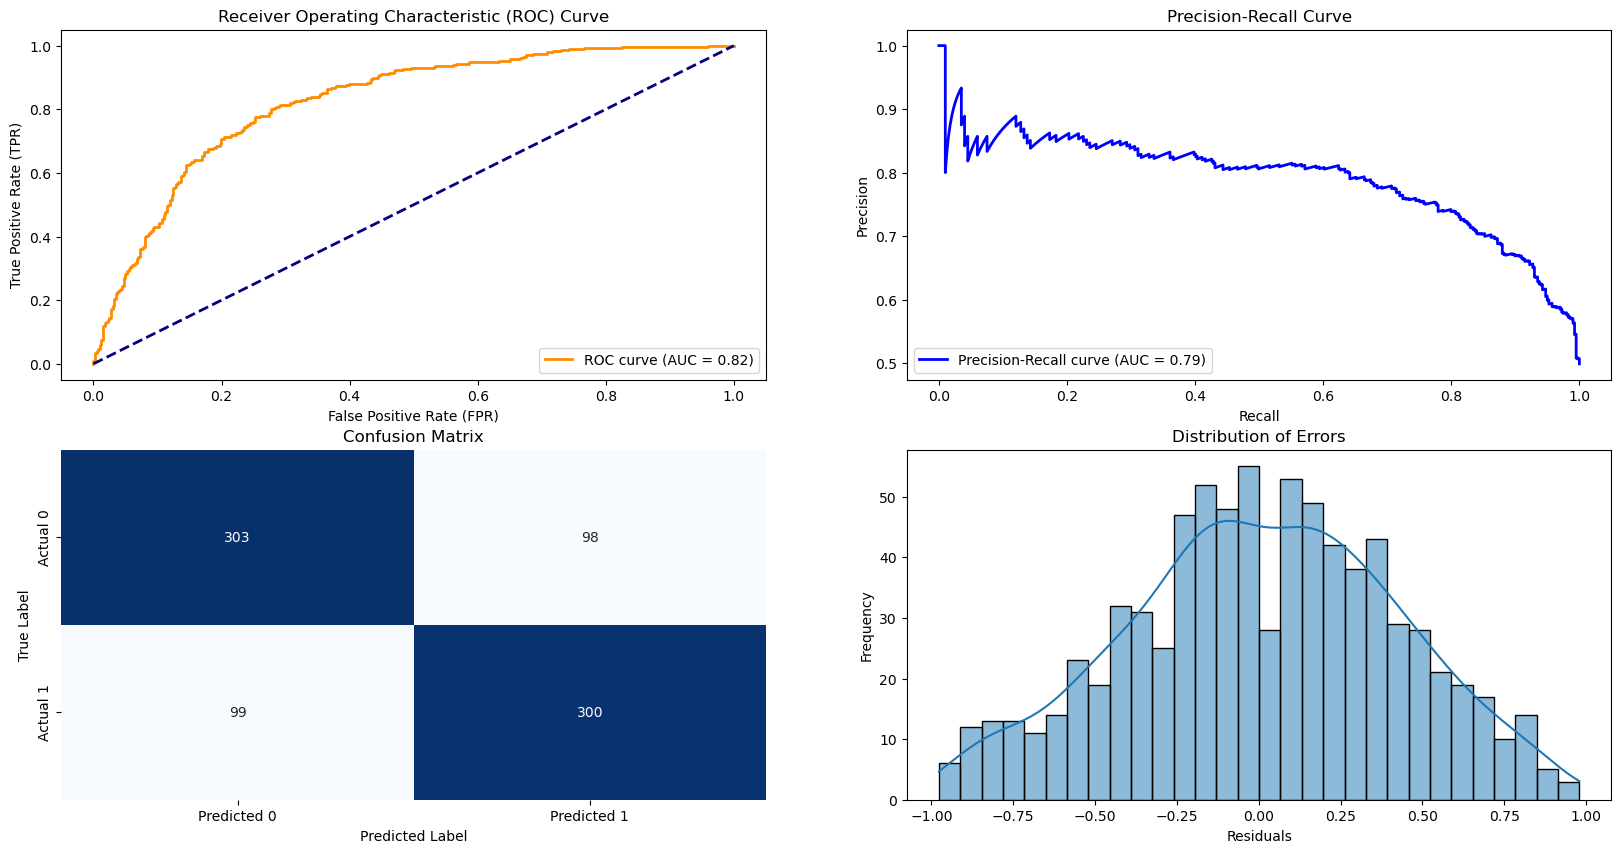

In [54]:
model = Model(LogisticRegression(C = 10, penalty='l2', solver='liblinear'), name='Grid Search Logistic Regression')
model.fit()
model.visualize_metrics()

In [55]:
metrics_LR_Best = model.get_metrics()
models_df = pd.concat([models_df, metrics_LR_Best.to_frame().T])
print(metrics_LR_Best)

Accuracy                                    0.75375
Precision                                  0.753769
Recall                                      0.75188
F1-Score                                   0.752823
ROC AUC                                    0.823149
Confusion Matrix             [[303, 98], [99, 300]]
PR AUC                                     0.790336
Name                Grid Search Logistic Regression
dtype: object


### Decision Tree Classifier


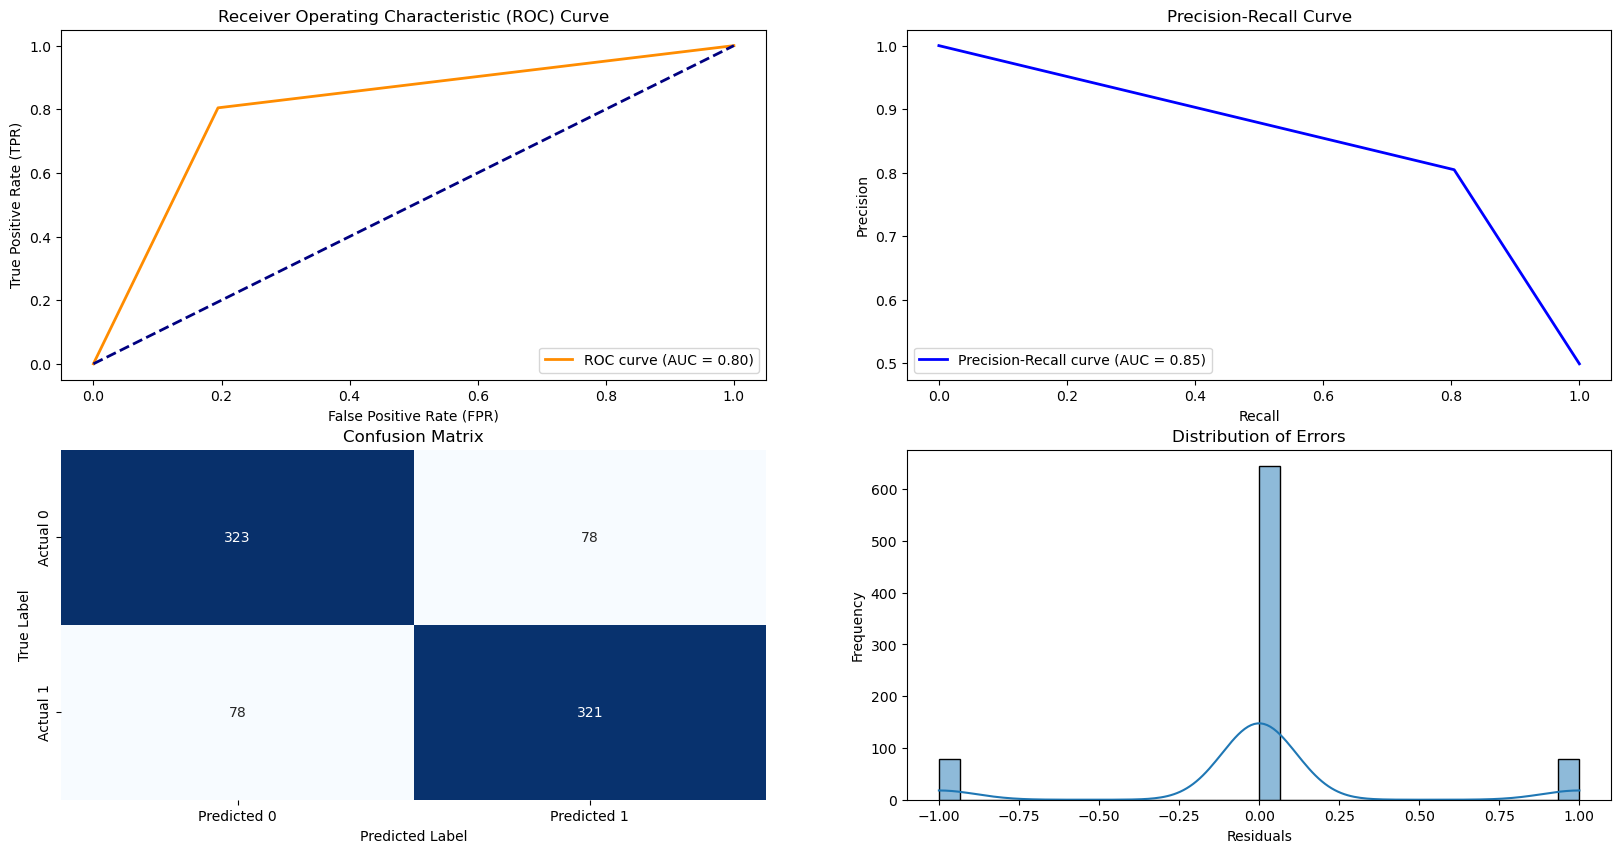

In [56]:
model = Model(DecisionTreeClassifier(), 'Decision Tree Classifier')
model.fit()
model.visualize_metrics()

In [57]:
metrics_DT = model.get_metrics()
models_df = pd.concat([models_df, metrics_DT.to_frame().T])
print(metrics_DT)

Accuracy                               0.805
Precision                           0.804511
Recall                              0.804511
F1-Score                            0.804511
ROC AUC                             0.804999
Confusion Matrix      [[323, 78], [78, 321]]
PR AUC                              0.744738
Name                Decision Tree Classifier
dtype: object


### Scaled

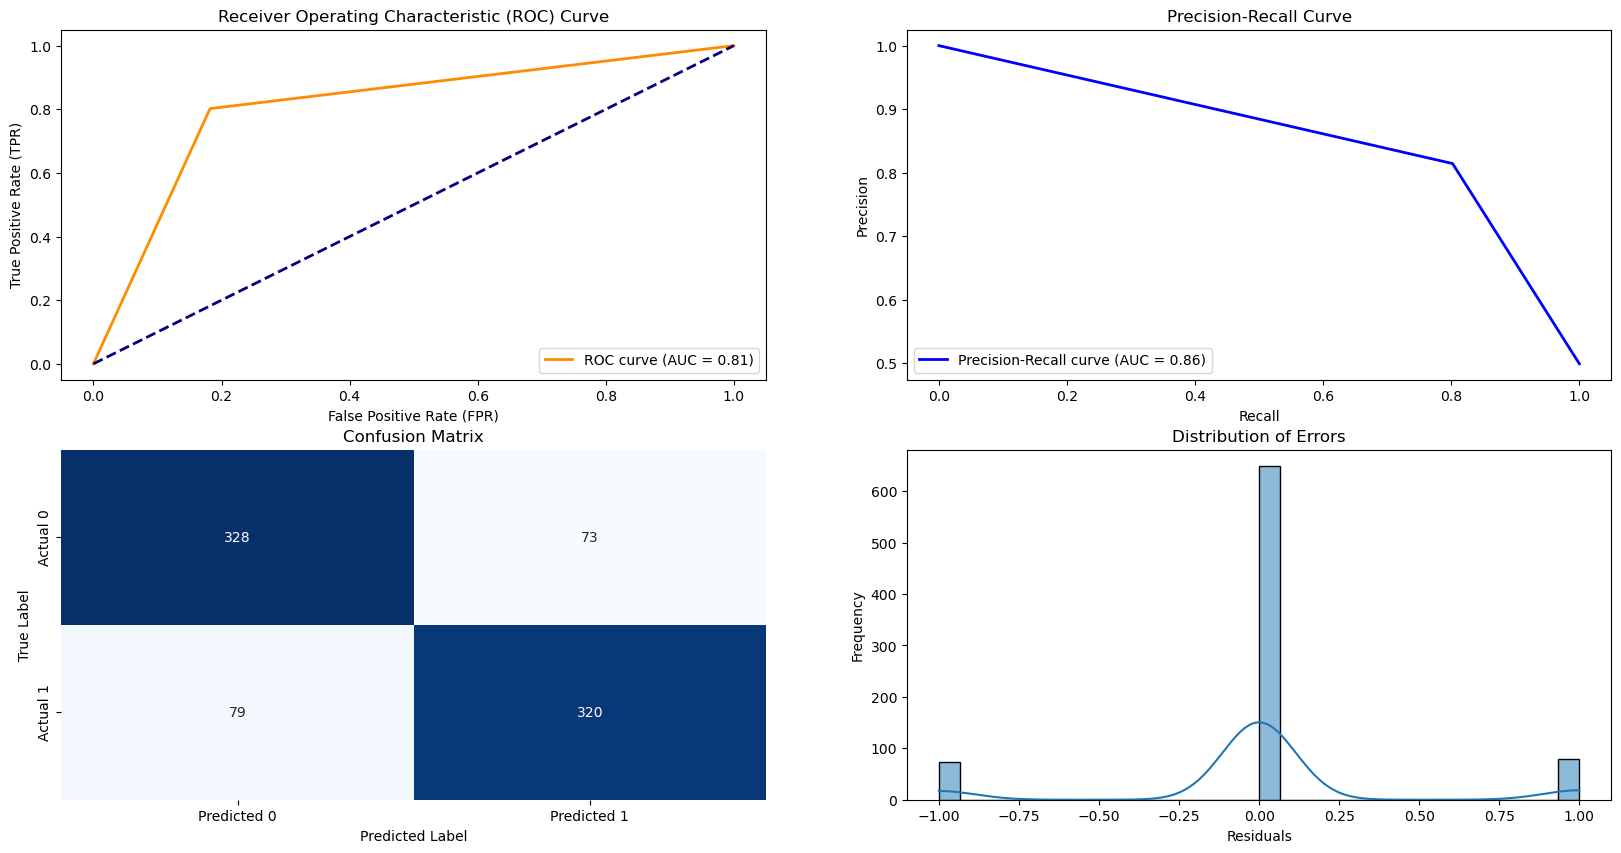

In [58]:
model = Model(DecisionTreeClassifier(), 'Decision Tree Classifier Scaled', scaled=True)
model.fit()
model.visualize_metrics()

In [59]:
metrics_DT = model.get_metrics()
models_df = pd.concat([models_df, metrics_DT.to_frame().T])
print(metrics_DT)

Accuracy                                       0.81
Precision                                  0.814249
Recall                                     0.802005
F1-Score                                   0.808081
ROC AUC                                     0.80998
Confusion Matrix             [[328, 73], [79, 320]]
PR AUC                                     0.751782
Name                Decision Tree Classifier Scaled
dtype: object


### Best Model


In [60]:
param_grid = {
    'max_depth': [None, 5, 10, 15,20, 25],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy']
}

In [61]:
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit the model to the data (search for the best hyperparameters)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20, 25],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

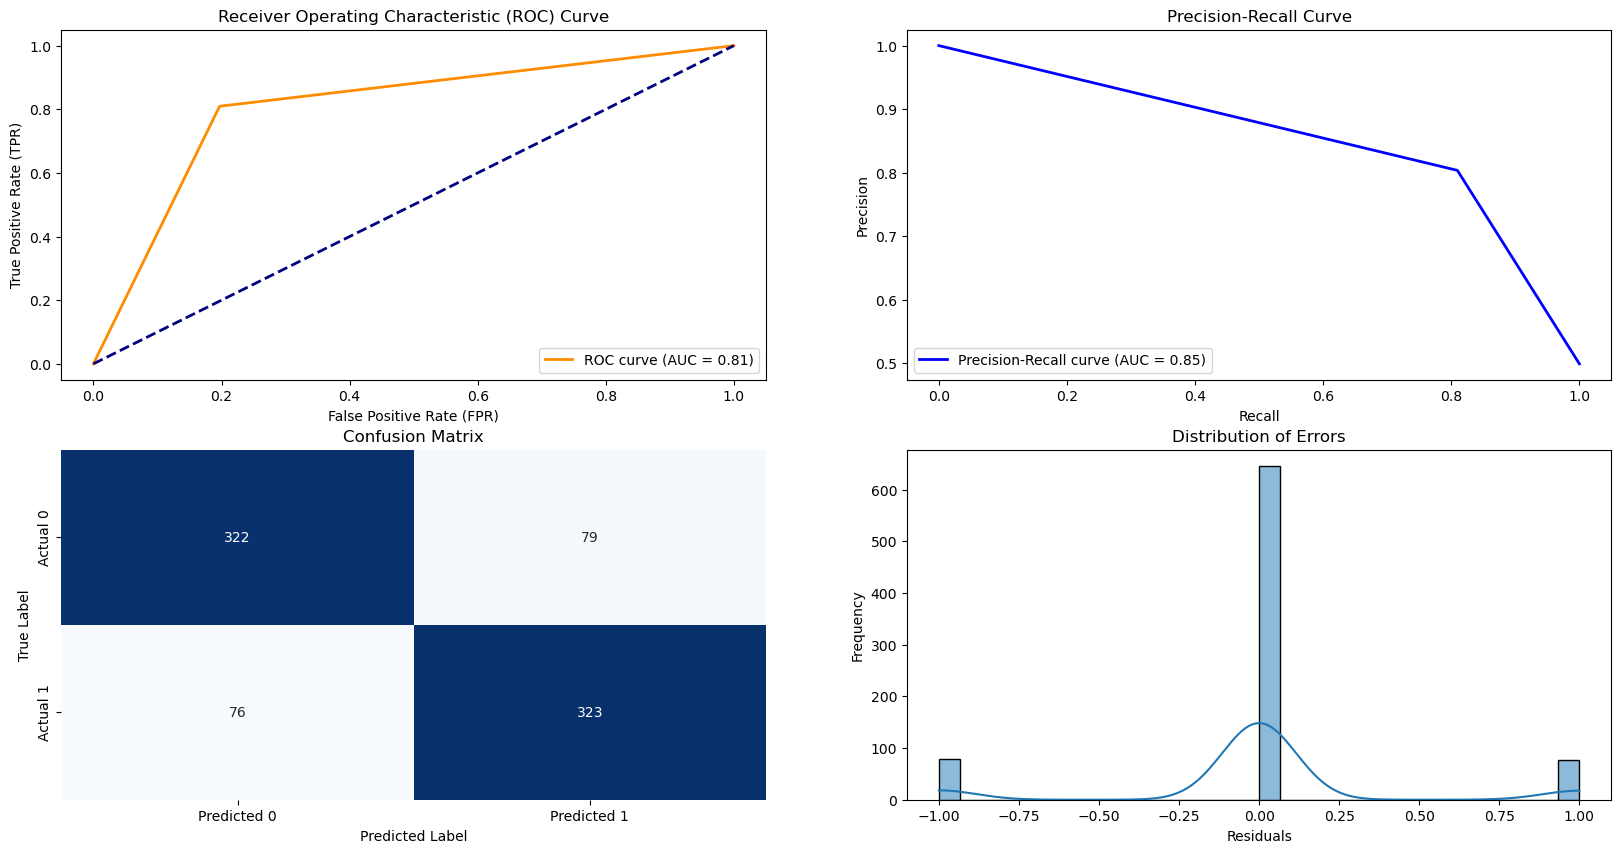

In [62]:
#{'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2}
model = Model(DecisionTreeClassifier(criterion='gini',max_depth=25, min_samples_leaf=1, min_samples_split=2), name='Grid Search Decision Tree Classifier')
model.fit()
model.visualize_metrics()


In [63]:
metrics_DT_Best = model.get_metrics()
models_df = pd.concat([models_df, metrics_DT_Best.to_frame().T])
print(metrics_DT_Best)

Accuracy                                         0.80625
Precision                                       0.803483
Recall                                          0.809524
F1-Score                                        0.806492
ROC AUC                                         0.806258
Confusion Matrix                  [[322, 79], [76, 323]]
PR AUC                                          0.745438
Name                Grid Search Decision Tree Classifier
dtype: object


### SVC

Support Vector Machines (SVM) are a class of supervised learning algorithms used for both classification and regression tasks. The Support Vector Classification (SVC) model is specifically designed for classification problems. In SVC, the algorithm aims to find a hyperplane in a high-dimensional space that best separates the data into different classes. The term "support vector" refers to the data points that lie closest to the decision boundary (hyperplane), and these vectors play a crucial role in determining the optimal separation. The Key concepts are:

Hyperplane: The decision boundary that separates the data points belonging to different classes. In a two-dimensional space, a hyperplane is a line; in higher dimensions, it becomes a hyperplane.

Support Vectors: Data points that are closest to the hyperplane and influence the position and orientation of the decision boundary.

Margin: The distance between the hyperplane and the nearest support vectors. A larger margin indicates a more robust separation.

Kernel Trick: SVC can efficiently handle non-linear relationships in the data by using a kernel function to map the input data into a higher-dimensional space.

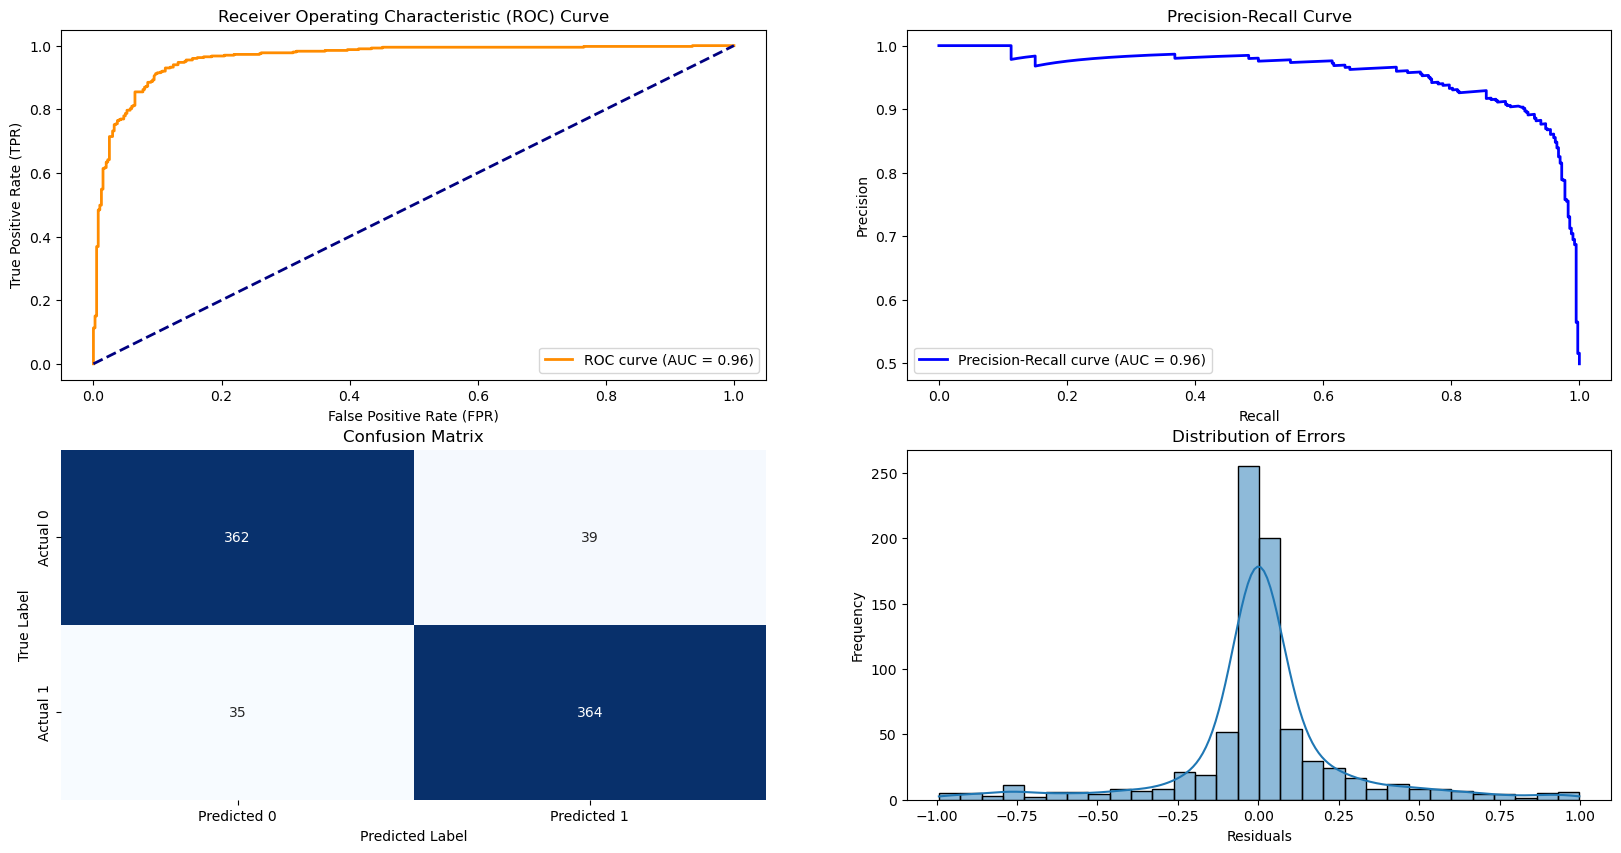

In [64]:
model = Model(SVC(probability=True), name='SVC')
model.fit()
model.visualize_metrics()

In [65]:
metrics_SVC = model.get_metrics()
models_df = pd.concat([models_df, metrics_SVC.to_frame().T])
print(metrics_SVC)

Accuracy                            0.9075
Precision                         0.903226
Recall                            0.912281
F1-Score                          0.907731
ROC AUC                            0.96125
Confusion Matrix    [[362, 39], [35, 364]]
PR AUC                            0.957009
Name                                   SVC
dtype: object


### Scaled

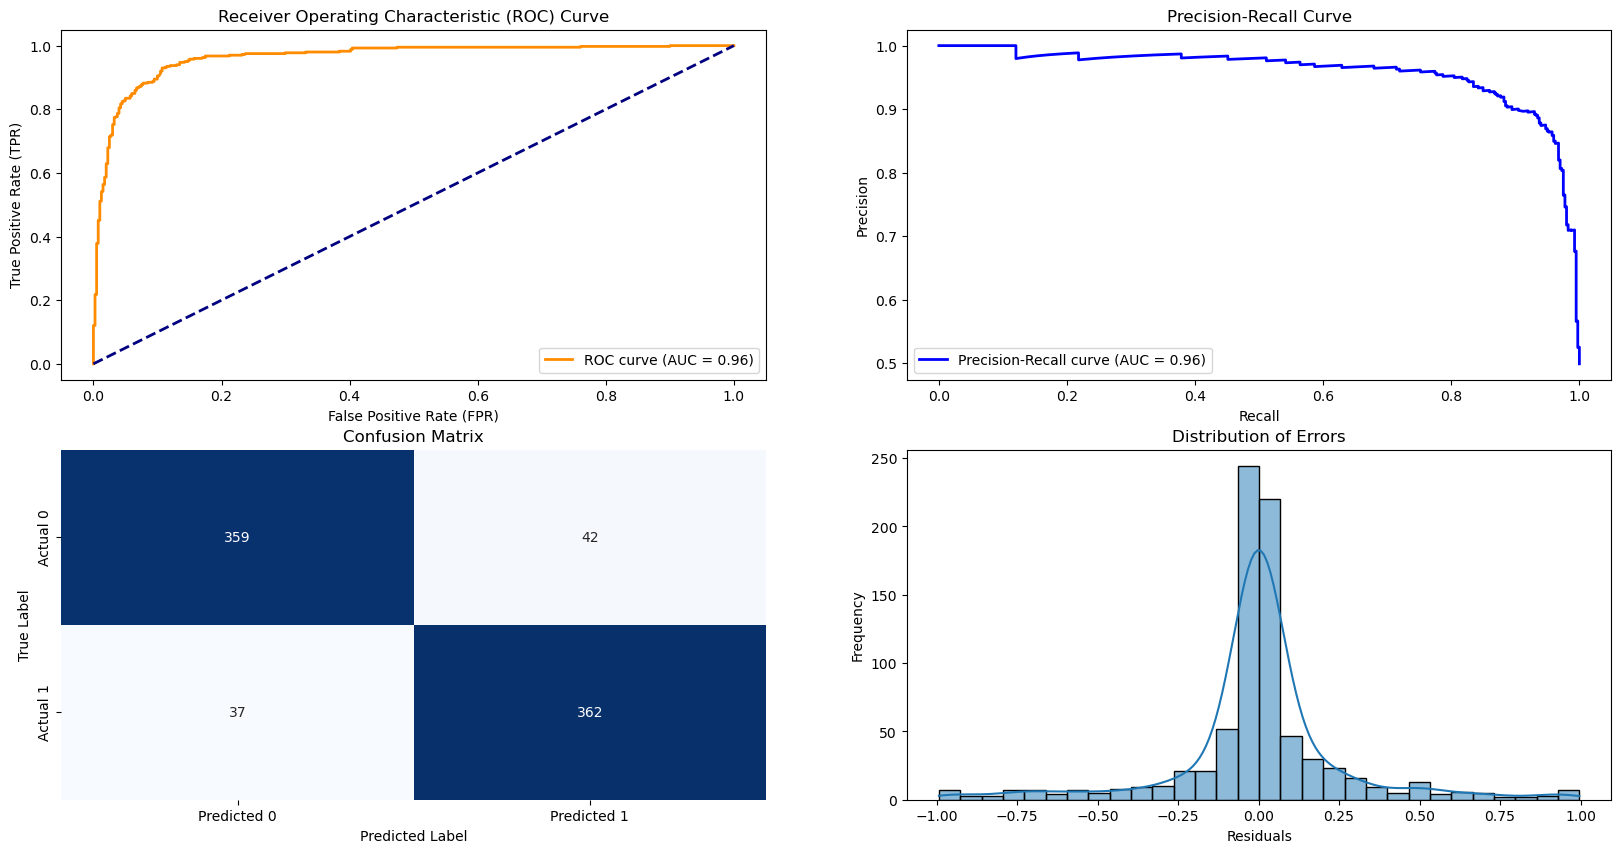

In [66]:
model = Model(SVC(probability=True), scaled=True, name='Scaled SVC')
model.fit()
model.visualize_metrics()

In [67]:
metrics_SVC = model.get_metrics()
models_df = pd.concat([models_df, metrics_SVC.to_frame().T])
print(metrics_SVC)

Accuracy                           0.90125
Precision                          0.89604
Recall                            0.907268
F1-Score                          0.901619
ROC AUC                           0.962522
Confusion Matrix    [[359, 42], [37, 362]]
PR AUC                            0.959255
Name                            Scaled SVC
dtype: object


### Best Model

In [68]:
param_grid = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

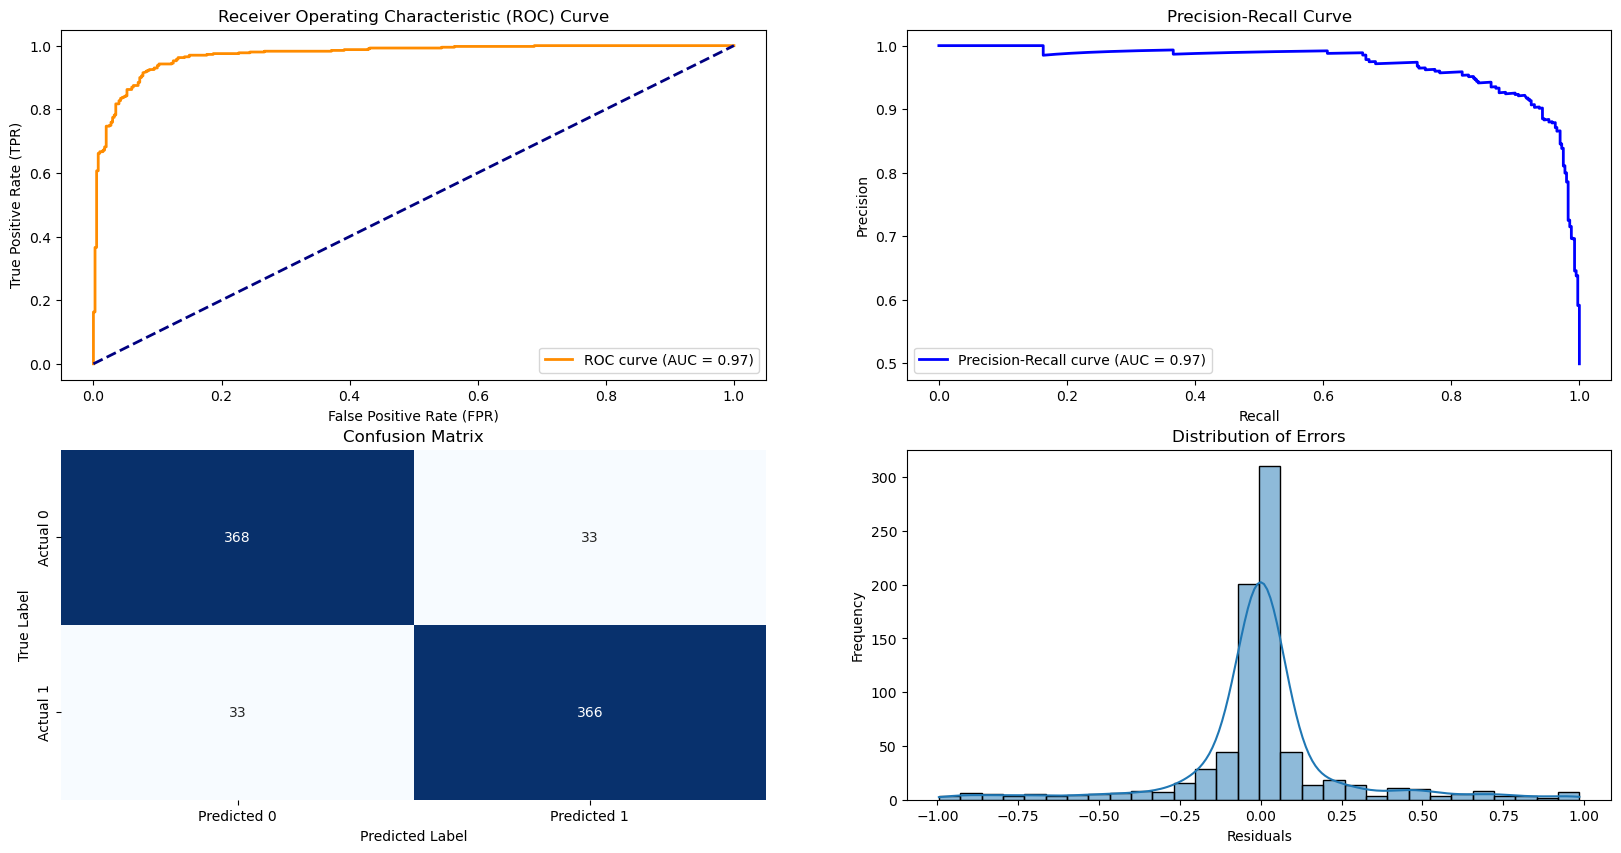

In [69]:
model = Model(SVC(C=10, gamma=0.1, kernel='rbf', probability=True), name='Grid Search SVC')
model.fit()
model.visualize_metrics()

In [70]:
metrics_SVC = model.get_metrics()
models_df = pd.concat([models_df, metrics_SVC.to_frame().T])
print(metrics_SVC)

Accuracy                            0.9175
Precision                         0.917293
Recall                            0.917293
F1-Score                          0.917293
ROC AUC                           0.970631
Confusion Matrix    [[368, 33], [33, 366]]
PR AUC                            0.969646
Name                       Grid Search SVC
dtype: object


### KNN

The K-Nearest Neighbors (K-NN) algorithm is a simple and intuitive supervised machine learning method used for both classification and regression tasks. It operates based on the principle that similar data points tend to share common characteristics and are often found close to each other in the feature space. Here's a brief explanation of how K-NN works:

Data Representation: Each data point in the dataset is represented as a point in a multi-dimensional space, where each dimension corresponds to a feature of the data.

Nearest Neighbors: For a given data point, the algorithm identifies its k nearest neighbors in the feature space. The term "k" represents the number of neighbors to consider, and it is a user-defined parameter.
Classification (or Regression): For a classification task, the majority class among the k nearest neighbors is assigned to the data point. In the case of regression, the average (or another metric) of the target values of the k nearest neighbors is used as the predicted value.

Distance Measure: The distance between data points is typically calculated using metrics such as Euclidean distance, Manhattan distance, or other distance measures, depending on the nature of the data.

Hyperparameter Tuning: The choice of the parameter k is crucial in k-NN. A smaller value of k makes the model more sensitive to noise, while a larger k smoothens the decision boundaries. The optimal value of k often needs to be determined through cross-validation.

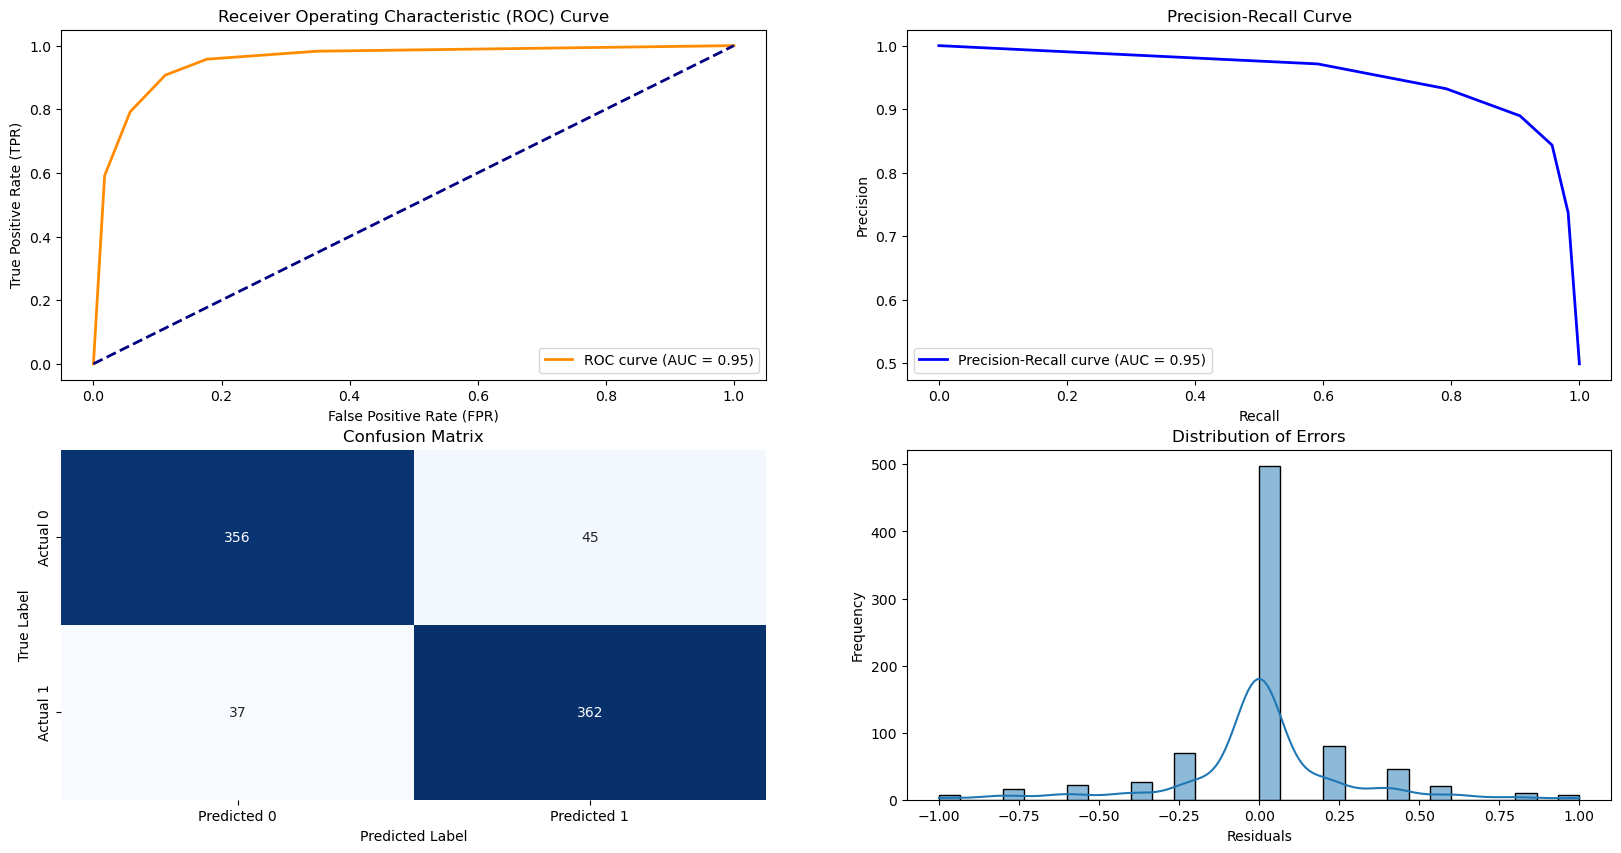

In [71]:
model = Model(KNeighborsClassifier(),'KNN')
model.fit()
model.visualize_metrics()


In [72]:
metrics_KNN = model.get_metrics()
models_df = pd.concat([models_df, metrics_KNN.to_frame().T])
print(metrics_KNN)

Accuracy                            0.8975
Precision                         0.889435
Recall                            0.907268
F1-Score                          0.898263
ROC AUC                           0.951884
Confusion Matrix    [[356, 45], [37, 362]]
PR AUC                            0.933366
Name                                   KNN
dtype: object


### Scaled

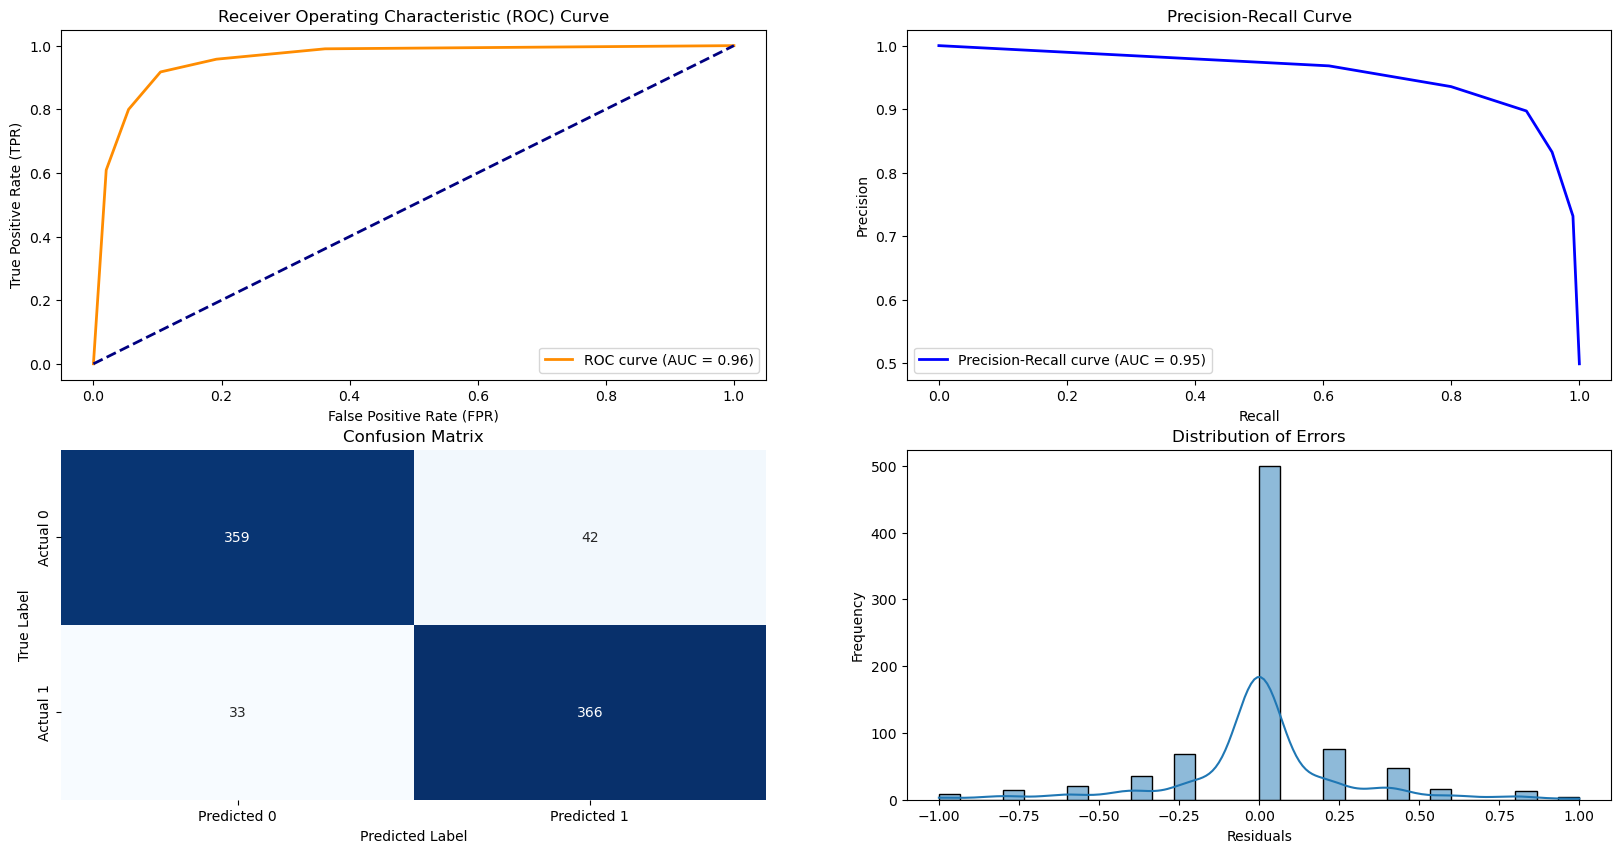

In [73]:
model = Model(KNeighborsClassifier(), scaled=True,name='KNN Scaled')
model.fit()
model.visualize_metrics()

In [74]:
metrics_KNN = model.get_metrics()
models_df = pd.concat([models_df, metrics_KNN.to_frame().T])
print(metrics_KNN)

Accuracy                           0.90625
Precision                         0.897059
Recall                            0.917293
F1-Score                          0.907063
ROC AUC                           0.955606
Confusion Matrix    [[359, 42], [33, 366]]
PR AUC                            0.935673
Name                            KNN Scaled
dtype: object


### Best Model

In [75]:
k_values = [i for i in range (1,31)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

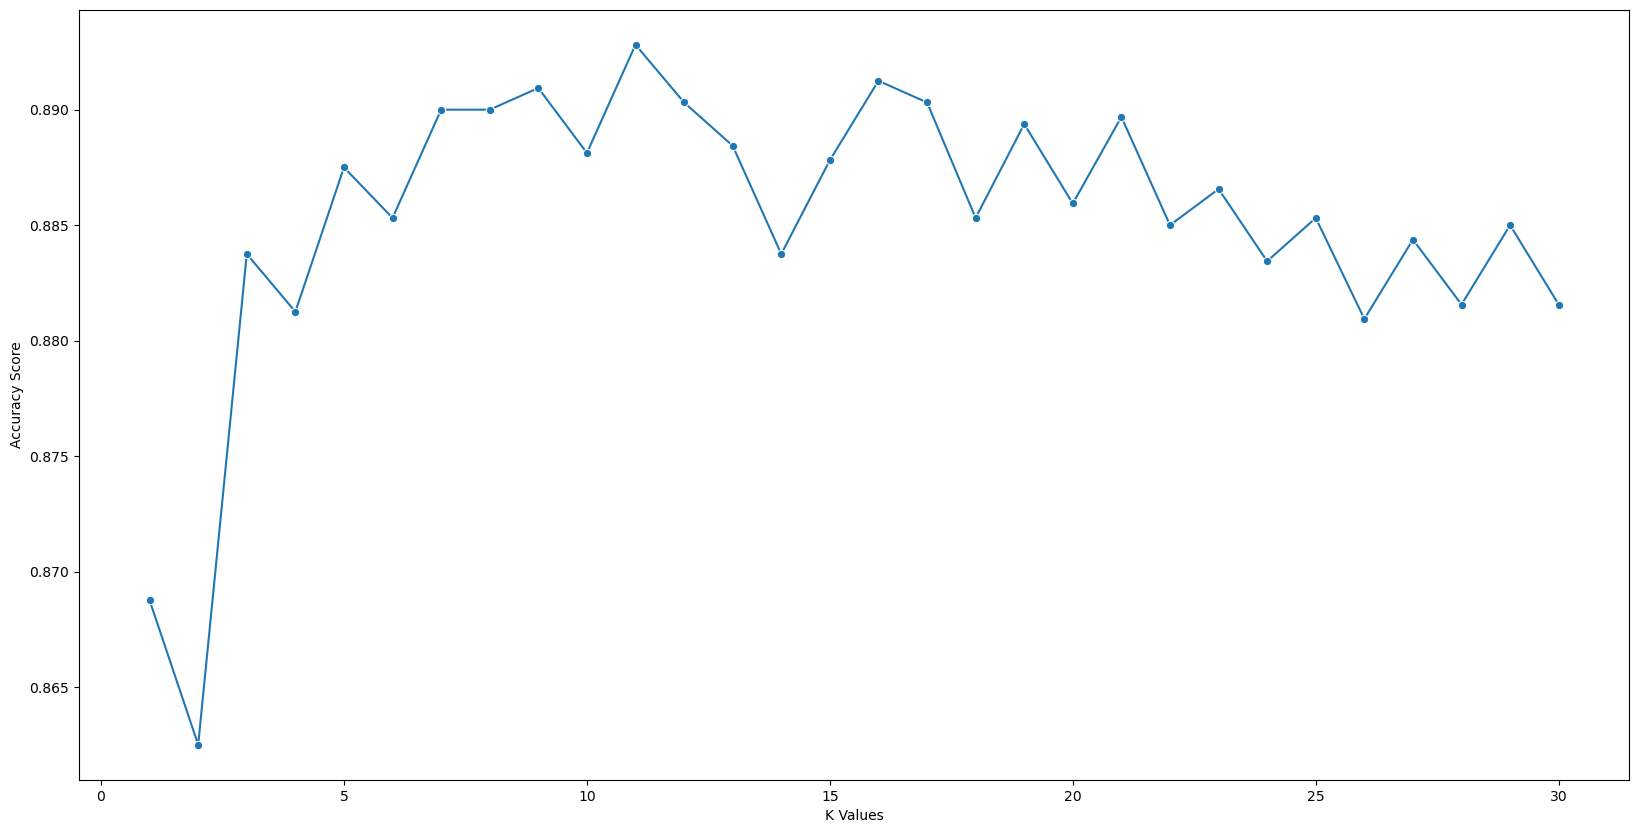

In [76]:
fig = plt.figure(figsize=(20,10))
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [77]:
best_index = np.argmax(scores)
best_k = k_values[best_index]
print(best_k)

11


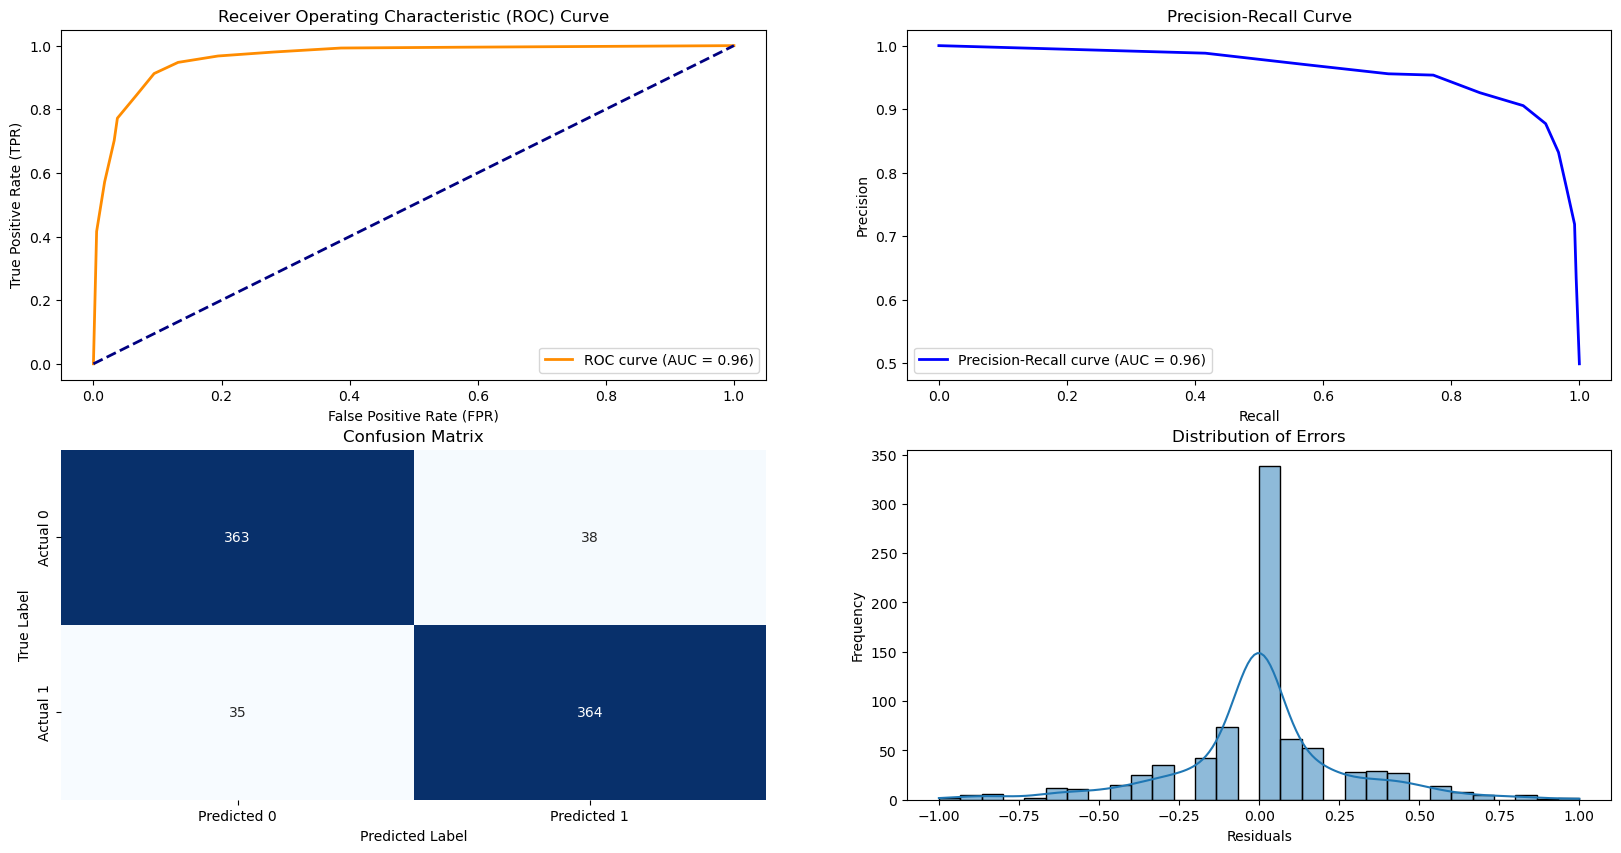

In [78]:
model = Model(KNeighborsClassifier(n_neighbors=best_k),scaled=True, name='Best KNN')
model.fit()
model.visualize_metrics()

In [79]:
metrics_KNN = model.get_metrics()
models_df = pd.concat([models_df, metrics_KNN.to_frame().T])
print(metrics_KNN)

Accuracy                           0.90875
Precision                         0.905473
Recall                            0.912281
F1-Score                          0.908864
ROC AUC                           0.962662
Confusion Matrix    [[363, 38], [35, 364]]
PR AUC                             0.95214
Name                              Best KNN
dtype: object


### Gradient Boosting Classifier

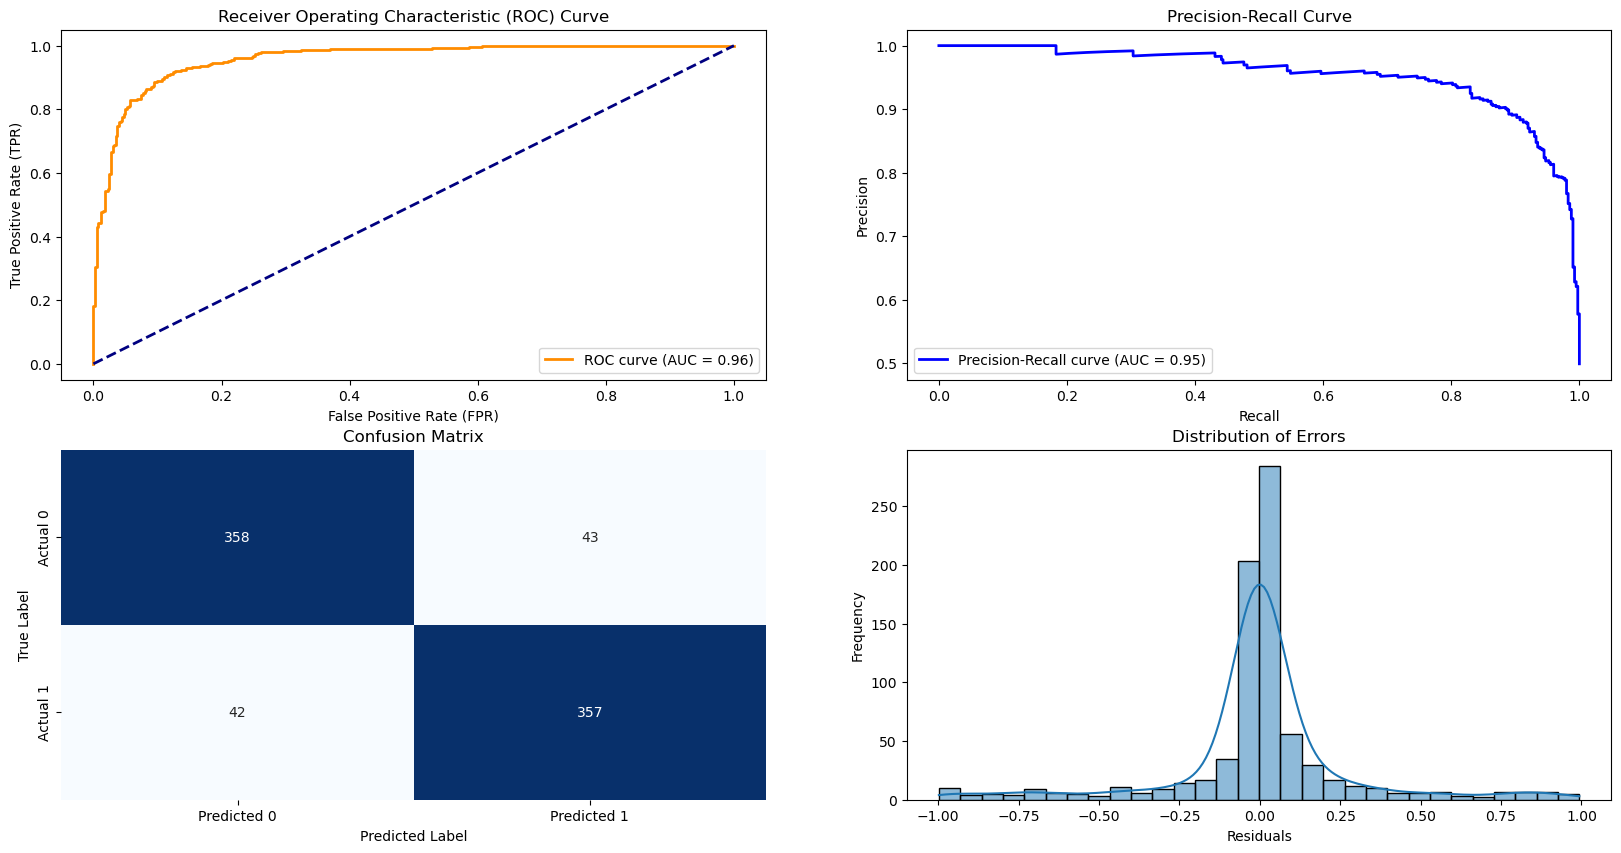

In [80]:
model = Model(GradientBoostingClassifier(n_estimators=200, learning_rate=0.2,max_depth=5,min_samples_leaf=50,
                                 min_samples_split=40,max_features='sqrt', random_state=42), name='Gradient Boosting Classifier')
model.fit()
model.visualize_metrics()

In [81]:
metrics_GBC = model.get_metrics()
models_df = pd.concat([models_df, metrics_GBC.to_frame().T])
print(metrics_GBC)

Accuracy                                 0.89375
Precision                                 0.8925
Recall                                  0.894737
F1-Score                                0.893617
ROC AUC                                 0.956981
Confusion Matrix          [[358, 43], [42, 357]]
PR AUC                                  0.954215
Name                Gradient Boosting Classifier
dtype: object


### Best Model


In [82]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [35,50],
    'min_samples_split': [1,2,5],
    'min_samples_leaf': [5],
    'subsample': [0.8],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [83]:
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END learning_rate=0.01, max_depth=35, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=35, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=35, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=35, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=35, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=35, max_features=auto, min_samples_leaf=5, min_samples_split=1, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END lea

[CV] END learning_rate=0.01, max_depth=35, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=35, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=35, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=35, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=35, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=50, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=35, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=35, max_features=sqrt, min_samples_l

[CV] END learning_rate=0.01, max_depth=35, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=35, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=35, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=200, subsample=0.8; total time=   2.2s
[CV] END learning_rate=0.01, max_depth=35, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=200, subsample=0.8; total time=   2.1s


KeyboardInterrupt: 

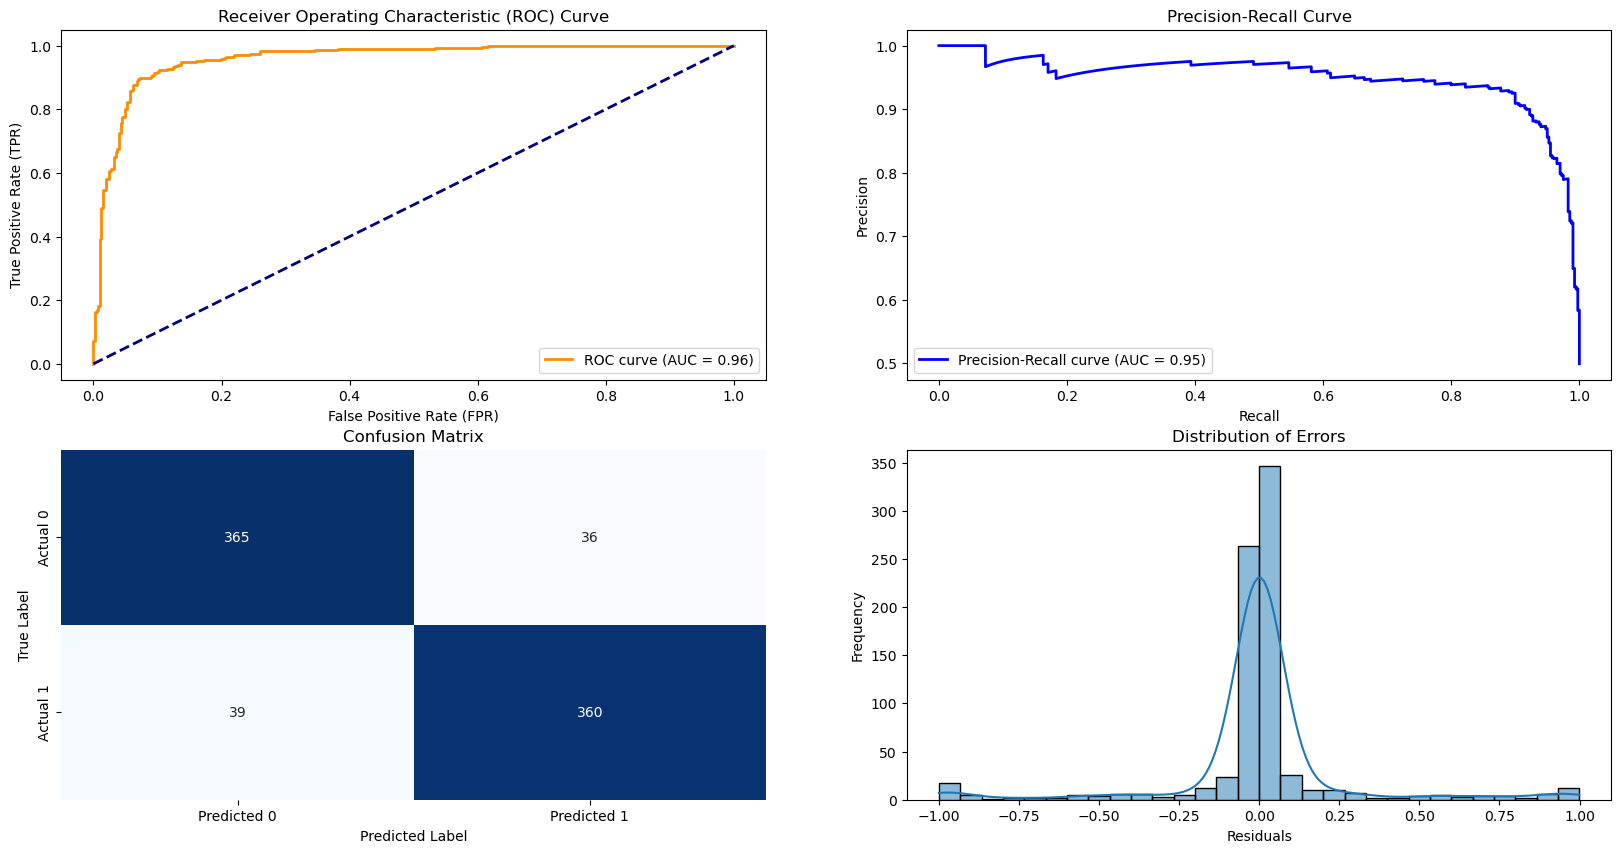

In [84]:
model = Model(GradientBoostingClassifier(n_estimators=50, learning_rate=0.2,max_depth=35,min_samples_leaf=5,
                                 min_samples_split=2,max_features='sqrt',subsample=0.8, random_state=42), name='Grid Search Gradient Boosting Classifier')
model.fit()
model.visualize_metrics()

In [85]:
metrics_GBC = model.get_metrics()
models_df = pd.concat([models_df, metrics_GBC.to_frame().T])
print(metrics_GBC)

Accuracy                                             0.90625
Precision                                           0.909091
Recall                                              0.902256
F1-Score                                             0.90566
ROC AUC                                             0.958687
Confusion Matrix                      [[365, 36], [39, 360]]
PR AUC                                              0.949177
Name                Grid Search Gradient Boosting Classifier
dtype: object


### Deep Learning

In [ ]:
pip install torch

In [87]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

In [86]:
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).float()
y_test = torch.from_numpy(y_test).float()
test_ds = TensorDataset(X_test,y_test)
train_ds = TensorDataset(X_train,y_train)

In [89]:
class BinaryNNModel(nn.Module):
    def __init__(self,input_features:int,
                 hidden_size:int,
                 dropout_rate:float,
                 output:int,
                 hidden_layers:int):
        super().__init__()
        ## Input
        self.linear_stack = nn.Sequential(
            nn.Linear(input_features,2*hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout_rate))
        for i in range(hidden_layers):
            self.linear_stack = self.linear_stack.append(nn.Linear((i+1)*(2)*hidden_size,(i+2)*(2)*hidden_size))
            self.linear_stack = self.linear_stack.append(nn.ReLU())
            self.linear_stack = self.linear_stack.append(nn.Dropout(dropout_rate))
        #Output Layer
        self.linear_stack = self.linear_stack.append(nn.Linear((hidden_layers+1)*2 * hidden_size,output))
        self.linear_stack.apply(custom_weights_init)
        self.float()

    def forward(self,x):
        return self.linear_stack(x)
def custom_weights_init(m):
    if isinstance(m, nn.Linear) or isinstance(m, nn.Conv2d):
        # You can use different initialization methods here
        nn.init.xavier_uniform_(m.weight)
        nn.init.zeros_(m.bias)
        

In [92]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [94]:
EPOCHS = [1000]
BATCH_SIZES = [40,80,160]
HIDDEN_SIZES = [2,3,4,5]
LAYERS = [1,2,3]
LEARNING_RATE = [0.01, 0.05, 0.1,0.2]

In [95]:
from torch.utils.tensorboard import SummaryWriter

In [ ]:
## DO not run because it's computational heavy
best_acc = 0
best_test_acc = 0
for epochs in EPOCHS:
    for batch_size in BATCH_SIZES:
        train_dl = DataLoader(train_ds, batch_size, shuffle=True)
        for hidden_size in HIDDEN_SIZES:
            for layer in LAYERS:
                for lr in LEARNING_RATE:
                    writer = SummaryWriter(log_dir=f'./runs/{batch_size}_{hidden_size}_{layer}_{lr}')
                    model = BinaryNNModel(input_features=X_train.shape[1],
                    hidden_size=hidden_size,
                    dropout_rate=.2,
                    output=1,
                    hidden_layers=layer)
                    loss_fn = nn.BCEWithLogitsLoss()
                    train_dl = DataLoader(train_ds, batch_size, shuffle=True)
                    optimizer = torch.optim.SGD(model.parameters(), lr = lr)
                    print('[START]',epochs, batch_size, hidden_size, layer, lr)
                    for epoch in range(epochs):
                        for x_batch, y_batch in train_dl:
                            y_logits = model(x_batch).squeeze()
                            output_prob = torch.sigmoid(y_logits)
                            y_pred = output_prob > 0.5
                            loss = loss_fn(y_logits, y_batch) 
                            acc = accuracy_fn(y_true=y_batch, y_pred=y_pred)

                            optimizer.zero_grad()
                            loss.backward()
                            optimizer.step()
                             y_logits = model(X_test).squeeze()
                        output_prob = torch.sigmoid(y_logits)
                        y_pred = output_prob > 0.5
                        acc_test = accuracy_fn(y_true=y_test, y_pred=y_pred)
                        writer.add_scalar("Loss/train", loss, epoch)
                        writer.add_scalar("Accuracy/train", acc, epoch)
                        writer.add_scalar("Accuracy/test", acc_test, epoch)
                        if acc_test > best_test_acc:
                            best_test_acc = acc_test
                        if acc > best_acc:
                            best_acc = acc
                            torch.save({
                            'epoch': epoch,
                            'model_state_dict': model.state_dict(),
                            'optimizer_state_dict': optimizer.state_dict(),
                            # Add other information you may want to save
                            }, f'./Weights/weights.torch')
                        if epoch % 10 == 0:
                            print(f"Epoch: {epoch} | Loss: {loss:.8f}, Accuracy: {acc:.2f}%")
                             for name, param in model.named_parameters():
                                writer.add_histogram(name, param, epoch)

In [96]:
print(best_test_acc)

NameError: name 'best_test_acc' is not defined

In [97]:
model = BinaryNNModel(input_features=X_train.shape[1],
                    hidden_size=8,
                    dropout_rate=.2,
                    output=1,
                    hidden_layers=2)
loss_fn = nn.BCEWithLogitsLoss()
train_dl = DataLoader(train_ds, 160, shuffle=True)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.2)
best_test_acc = 0
for epoch in range(1000):
    for x_batch, y_batch in train_dl:
        y_logits = model(x_batch).squeeze()
        output_prob = torch.sigmoid(y_logits)
        y_pred = output_prob > 0.5
        loss = loss_fn(y_logits, y_batch) 
        acc = accuracy_fn(y_true=y_batch, y_pred=y_pred)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        y_logits = model(X_test).squeeze()
    output_prob = torch.sigmoid(y_logits)
    y_proba = output_prob.detach().numpy()
    y_pred = output_prob > 0.5
    accuracy = metrics.accuracy_score(y_test, y_pred)
    if accuracy > best_test_acc:
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            # Add other information you may want to save
            }, f'./weights_best.torch')
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.8f}, Accuracy: {acc:.2f}%")

Epoch: 0 | Loss: 0.65648216, Accuracy: 57.50%
Epoch: 10 | Loss: 0.39017773, Accuracy: 83.12%
Epoch: 20 | Loss: 0.42916209, Accuracy: 77.50%
Epoch: 30 | Loss: 0.32934514, Accuracy: 83.75%
Epoch: 40 | Loss: 0.44852370, Accuracy: 81.25%
Epoch: 50 | Loss: 0.33464390, Accuracy: 84.38%
Epoch: 60 | Loss: 0.34451646, Accuracy: 80.62%
Epoch: 70 | Loss: 0.32155314, Accuracy: 86.25%
Epoch: 80 | Loss: 0.25144729, Accuracy: 90.62%
Epoch: 90 | Loss: 0.18894616, Accuracy: 91.88%
Epoch: 100 | Loss: 0.35896453, Accuracy: 85.00%
Epoch: 110 | Loss: 0.24296930, Accuracy: 88.12%
Epoch: 120 | Loss: 0.21407788, Accuracy: 91.88%
Epoch: 130 | Loss: 0.23962441, Accuracy: 89.38%
Epoch: 140 | Loss: 0.23864827, Accuracy: 88.75%
Epoch: 150 | Loss: 0.17966376, Accuracy: 93.75%
Epoch: 160 | Loss: 0.21509977, Accuracy: 92.50%
Epoch: 170 | Loss: 0.18958683, Accuracy: 94.38%
Epoch: 180 | Loss: 0.24595353, Accuracy: 90.62%
Epoch: 190 | Loss: 0.18801208, Accuracy: 92.50%
Epoch: 200 | Loss: 0.18524036, Accuracy: 93.12%
Epo

The best model which achieved the accuracy above has:

- 160 batch size
- 8 hidden size
- 2 hidden layers
- 0.2 learning rate
- 983 epochs

In [98]:
model.load_state_dict(torch.load('weights_best.torch'),strict=False)
model.eval()

BinaryNNModel(
  (linear_stack): Sequential(
    (0): Linear(in_features=7, out_features=16, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=16, out_features=32, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=32, out_features=48, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=48, out_features=1, bias=True)
  )
)

In [99]:
y_logits = model(X_test).squeeze()
output_prob = torch.sigmoid(y_logits)
y_proba = output_prob.detach().numpy()
y_pred = output_prob > 0.5

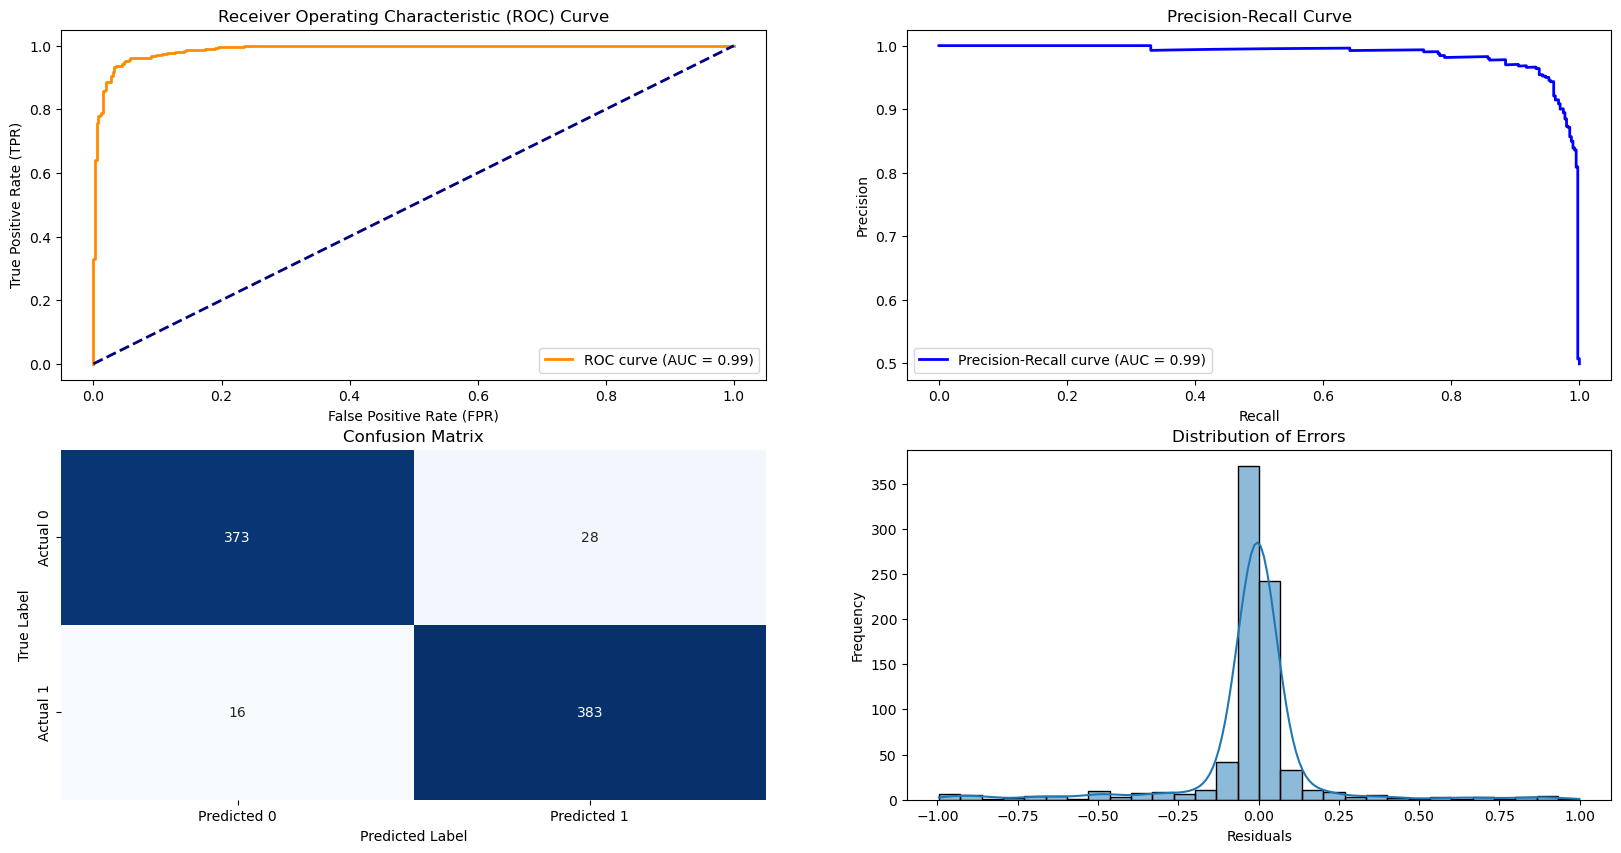

In [100]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba)
roc_auc = metrics.roc_auc_score(y_test, y_proba)
# Calculate Precision-Recall curve and AUC
precision, recall, _ = metrics.precision_recall_curve(y_test, y_proba)
pr_auc = metrics.auc(recall, precision)
# Plot ROC curve
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
# Plot Precision-Recall curve
plt.subplot(2, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

residuals = y_test - y_proba
# Plot Confusion Matrix and Distribution of errors
plt.subplot(2, 2, 3)
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.subplot(2, 2, 4)
sns.histplot(residuals, bins=30, edgecolor='black', kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Errors')
plt.show()

In [101]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_proba)
conf_mat = metrics.confusion_matrix(y_test, y_pred)
pr_auc = metrics.average_precision_score(y_test, y_proba)
metrics_NN = pd.Series({
'Accuracy': accuracy,
'Precision': precision,
'Recall': recall,
'F1-Score': f1,
'ROC AUC': roc_auc,
'PR AUC': pr_auc,
'Confusion Matrix': conf_mat,
'Name': 'PyTorch Best Model'
})
models_df = pd.concat([models_df, metrics_NN.to_frame().T])
print(metrics_NN)

Accuracy                             0.945
Precision                         0.931873
Recall                              0.9599
F1-Score                          0.945679
ROC AUC                           0.986494
PR AUC                            0.986691
Confusion Matrix    [[373, 28], [16, 383]]
Name                    PyTorch Best Model
dtype: object


### TensorFlow

In [102]:
import tensorflow as tf
from keras.layers import Dense, Input
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
tf.random.set_seed(42)

In [103]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Best Model "By Hands"

After many trials i've find a model which has a better accuracy with a value of 96.875%. The model is with 2 hidden layers and the structure is the following

In [104]:
features_in = X_train.shape[1]
initializer = tf.keras.initializers.GlorotNormal(42)
input_layer = Input(shape = (features_in, ))
layer1 = Dense(units = 24, activation = 'relu', kernel_initializer=initializer)(input_layer)
layer2 = Dense(units = 12, activation = 'relu',kernel_initializer=initializer)(layer1)
layer3 = Dense(units = 6, activation = 'relu',kernel_initializer=initializer)(layer2)
output_layer = Dense(units = 1, activation = 'sigmoid')(layer3)
model = Model(inputs = input_layer, outputs = output_layer, name = 'Binary_Class')
model.summary()

Model: "Binary_Class"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 24)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 577 (2.25 KB)

 Trainable params: 577 (2.25 KB)

 Non-trainable params: 0 (0.00 B)

### Training


In [120]:
## DO NOT RUN
features_in = X_train.shape[1]
best_acc = 0
best_i = 0
for i in range(100):
    initializer = tf.keras.initializers.GlorotNormal(42)
    input_layer = Input(shape = (features_in, ))
    layer1 = Dense(units = 24, activation = 'relu', kernel_initializer=initializer)(input_layer)
    layer2 = Dense(units = 12, activation = 'relu',kernel_initializer=initializer)(layer1)
    layer3 = Dense(units = 6, activation = 'relu',kernel_initializer=initializer)(layer2)
    output_layer = Dense(units = 1, activation = 'sigmoid')(layer3)
    model = Model(inputs = input_layer, outputs = output_layer, name = 'Binary_Class')

    model.compile(optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.2), 
                loss = tf.keras.losses.BinaryCrossentropy(), 
                metrics = "accuracy")
    model_checkpoint = ModelCheckpoint(f'./best_models/best_model_{i}.h', 
                                    monitor = 'val_loss', 
                                    save_best_only = True, verbose=0)
    history = model.fit(x = X_train, y = y_train, 
                    batch_size = 32, epochs = 600, verbose = 0, 
                    callbacks = [model_checkpoint], 
                    shuffle = True,
                    validation_data = (X_test, y_test))
    ## Load best model
    loaded_model = load_model(f"./best_models/best_model_{i}.h")

    #Calculate test predictions
    y_pred_prob_test = loaded_model.predict(X_test)
    y_pred_test = np.where(y_pred_prob_test.squeeze() < 0.5, 0, 1)
    acc_test = metrics.accuracy_score(y_test, y_pred_test)
    print(acc_test)
    if acc_test > best_acc:
        best_acc = acc_test
        best_i = i

ImportError: `keras.optimizers.legacy` is not supported in Keras 3. When using `tf.keras`, to continue using a `tf.keras.optimizers.legacy` optimizer, you can install the `tf_keras` package (Keras 2) and set the environment variable `TF_USE_LEGACY_KERAS=True` to configure TensorFlow to use `tf_keras` when accessing `tf.keras`.

Load the best evaluation for each run and compare them to get the best one.

In [119]:
for i in range(100):
    loaded_model = load_model(f"./best_models/best_model_{i}.h")

    #Calculate test predictions
    y_pred_prob_test = loaded_model.predict(X_test)
    y_pred_test = np.where(y_pred_prob_test.squeeze() < 0.5, 0, 1)
    acc_test = metrics.accuracy_score(y_test, y_pred_test)
    print(acc_test)
    if acc_test > best_acc:
        best_acc = acc_test
        best_i = i
print(best_i, best_acc)

ValueError: File format not supported: filepath=./best_models/best_model_0.h. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(./best_models/best_model_0.h, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

The best model is the 93th with an accuracy of 96.875%. After this let's plot the training and the test performance of the model

NameError: name 'history' is not defined

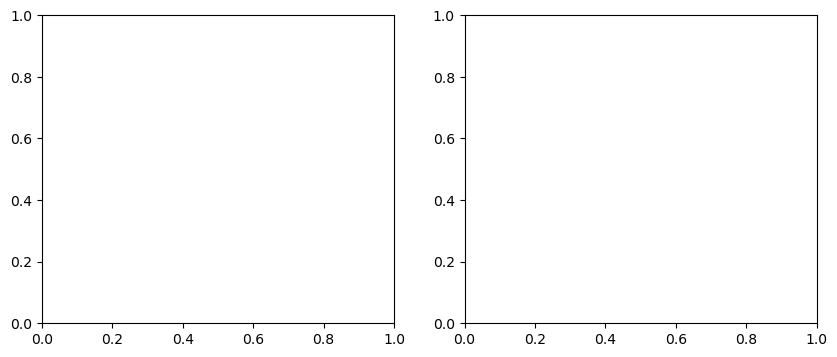

In [112]:
fig,axs = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
axs[0].plot(history.history['loss'], label = 'Train')
axs[0].plot(history.history['val_loss'], label = 'Validation')
axs[0].set_title("Binary Cross Entropy", fontsize = 12, fontweight = "bold")
axs[0].set_xlabel("epochs", fontsize = 10, fontweight = "bold")
axs[0].set_ylabel("loss", fontsize = 10, fontweight = "bold")
axs[0].legend()

axs[1].plot(history.history['accuracy'], label = 'Train')
axs[1].plot(history.history['val_accuracy'], label = 'Validation')
axs[1].set_title("Accuracy", fontsize = 12, fontweight = "bold")
axs[1].set_xlabel("epochs", fontsize = 10, fontweight = "bold")
axs[1].set_ylabel("score", fontsize = 10, fontweight = "bold")
axs[1].legend()

fig.tight_layout()
fig.show()
loaded_model = load_model(f"best_models/best_model_{best_i}.h")
# We make the predictions with the best model.
y_pred_prob_train = loaded_model.predict(X_train)
y_pred_train = np.where(y_pred_prob_train.squeeze() <= 0.5, 0, 1)

y_pred_prob_test = loaded_model.predict(X_test)
y_pred_test = np.where(y_pred_prob_test.squeeze() <=0.5, 0, 1)
print(f'Accuracy Train: {metrics.accuracy_score(y_train, y_pred_train):.4f}')
print(f'Accuracy Test: {metrics.accuracy_score(y_test, y_pred_test):.4f}')

In [113]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob_test)
roc_auc = metrics.roc_auc_score(y_test, y_pred_prob_test)
# Calculate Precision-Recall curve and AUC
precision, recall, _ = metrics.precision_recall_curve(y_test, y_pred_prob_test)
pr_auc = metrics.auc(recall, precision)
# Plot ROC curve
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Plot Precision-Recall curve
plt.subplot(2, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

residuals = y_test - y_pred_prob_test
# Plot Confusion Matrix and Distribution of errors
plt.subplot(2, 2, 3)
conf_mat = metrics.confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.subplot(2, 2, 4)
sns.histplot(residuals, edgecolor='black')
plt.legend('',frameon=False)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Errors')
plt.show()

NameError: name 'y_pred_prob_test' is not defined

In [114]:
accuracy = metrics.accuracy_score(y_test, y_pred_test)
precision = metrics.precision_score(y_test, y_pred_test)
recall = metrics.recall_score(y_test, y_pred_test)
f1 = metrics.f1_score(y_test, y_pred_test)
roc_auc = metrics.roc_auc_score(y_test, y_pred_prob_test)
conf_mat = metrics.confusion_matrix(y_test, y_pred_test)
pr_auc = metrics.average_precision_score(y_test, y_pred_prob_test)
metrics_TF = pd.Series({
'Accuracy': accuracy,
'Precision': precision,
'Recall': recall,
'F1-Score': f1,
'ROC AUC': roc_auc,
'PR AUC': pr_auc,
'Confusion Matrix': conf_mat,
'Name':'TF Best Model'
})
models_df = pd.concat([models_df, metrics_TF.to_frame().T])
print(metrics_TF)

NameError: name 'y_pred_test' is not defined

### Model Comparison

In [115]:
models_df

Name Accuracy Precision    Recall  \
0                      Gaussian Naive Bayes   0.7625  0.770026  0.746867   
0                     Bernoulli Naive Bayes  0.70125  0.709424  0.679198   
0                       Logistic Regression  0.75375  0.753769   0.75188   
0                Logistic Regression Scaled  0.75875  0.752451  0.769424   
0           Grid Search Logistic Regression  0.75375  0.753769   0.75188   
0                  Decision Tree Classifier    0.805  0.804511  0.804511   
0           Decision Tree Classifier Scaled     0.81  0.814249  0.802005   
0      Grid Search Decision Tree Classifier  0.80625  0.803483  0.809524   
0                                       SVC   0.9075  0.903226  0.912281   
0                                Scaled SVC  0.90125   0.89604  0.907268   
0                           Grid Search SVC   0.9175  0.917293  0.917293   
0                                       KNN   0.8975  0.889435  0.907268   
0                                KNN Scaled  0.90625  0.897059  0.917293   
0                                  Best KNN  0.90875  0.905473  0.912281   
0              Gradient Boosting Classifier  0.89375    0.8925  0.894737   
0  Grid Search Gradient Boosting Classifier  0.90625  0.909091  0.902256   
0                        PyTorch Best Model    0.945  0.931873    0.9599   

   F1-Score   ROC AUC          Confusion Matrix    PR AUC  
0   0.75827  0.850899   [[312, 89], [101, 298]]  0.846821  
0  0.693982  0.759252  [[290, 111], [128, 271]]  0.737735  
0  0.752823   0.82313    [[303, 98], [99, 300]]  0.790266  
0  0.760843  0.823249   [[300, 101], [92, 307]]  0.790764  
0  0.752823  0.823149    [[303, 98], [99, 300]]  0.790336  
0  0.804511  0.804999    [[323, 78], [78, 321]]  0.744738  
0  0.808081   0.80998    [[328, 73], [79, 320]]  0.751782  
0  0.806492  0.806258    [[322, 79], [76, 323]]  0.745438  
0  0.907731   0.96125    [[362, 39], [35, 364]]  0.957009  
0  0.901619  0.962522    [[359, 42], [37, 362]]  0.959255  
0  0.917293  0.970631    [[368, 33], [33, 366]]  0.969646  
0  0.898263  0.951884    [[356, 45], [37, 362]]  0.933366  
0  0.907063  0.955606    [[359, 42], [33, 366]]  0.935673  
0  0.908864  0.962662    [[363, 38], [35, 364]]   0.95214  
0  0.893617  0.956981    [[358, 43], [42, 357]]  0.954215  
0   0.90566  0.958687    [[365, 36], [39, 360]]  0.949177  
0  0.945679  0.986494    [[373, 28], [16, 383]]  0.986691

In [116]:
models_df.index = models_df.Name
models_df = models_df.drop('Name',axis=1)

<Axes: xlabel='Name'>

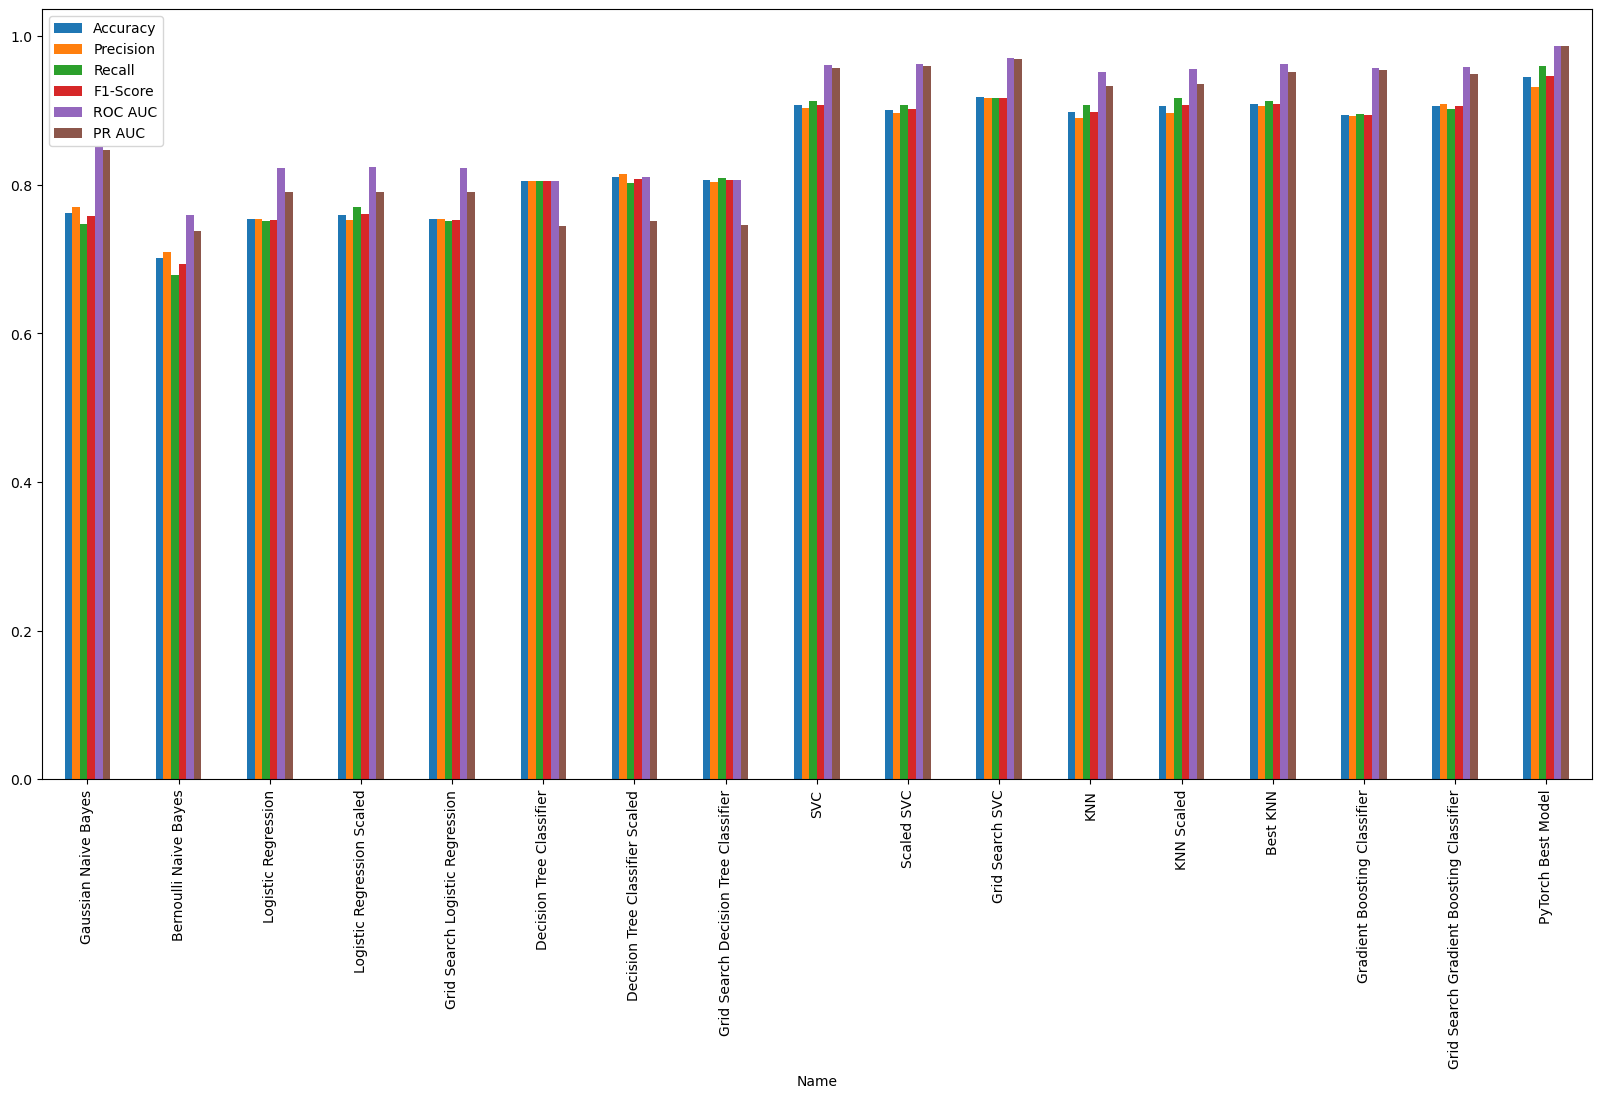

In [117]:
df = models_df[[x for x in models_df.columns if x != 'Confusion Matrix']]
df.plot.bar(figsize=(20,10))

### Highest in each role

In [118]:
for col in models_df.columns:
    if col != 'Confusion Matrix':
        print(models_df.sort_values(by=col, ascending=False)[col].head(1))

Name
PyTorch Best Model    0.945
Name: Accuracy, dtype: object
Name
PyTorch Best Model    0.931873
Name: Precision, dtype: object
Name
PyTorch Best Model    0.9599
Name: Recall, dtype: object
Name
PyTorch Best Model    0.945679
Name: F1-Score, dtype: object
Name
PyTorch Best Model    0.986494
Name: ROC AUC, dtype: object
Name
PyTorch Best Model    0.986691
Name: PR AUC, dtype: object


In [121]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)


In [122]:
pip install tf_keras


  Obtaining dependency information for tf_keras from https://files.pythonhosted.org/packages/75/aa/cf09f8956d4f276f655b13674e15d8d6015fd832f9689aa9ff2a515781ab/tf_keras-2.16.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [125]:
export tF_USE_LEGACY_KERAS=True



SyntaxError: invalid syntax (4291430588.py, line 1)